In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from statistics import stdev
import statistics 
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import sem
import scipy
import math

%matplotlib inline

# 1 Overall Coefficient Distribution

import data

In [2]:
csv_dir = 'model_coeffs/'
file_list = [os.path.join(csv_dir, f) for f in os.listdir(csv_dir)]
coeff = []
for l in file_list:
    data = pd.read_csv(l)
    coeff.append(data)
coeff = pd.concat(coeff)

In [3]:
coeff.head()

Date       variable  response_max_spire_auto_luxury_model  \
0  2019-01-03    topic_0_bin                             -0.000455   
1  2019-01-03    topic_1_bin                              0.055993   
2  2019-01-03   topic_10_bin                              0.011705   
3  2019-01-03  topic_100_bin                             -0.105617   
4  2019-01-03  topic_101_bin                              0.033038   

   response_max_spire_fashion_luxuryjewelry_model  \
0                                       -0.024242   
1                                       -0.004158   
2                                        0.000000   
3                                        0.000000   
4                                        0.077044   

   response_max_spire_fashion_luxurymale_model  \
0                                     0.013880   
1                                     0.004182   
2                                     0.014920   
3                                     0.134111   
4                                     0.185010   

   response_max_spire_fashion_luxuryretail_model  \
0                                       0.000000   
1                                       0.000000   
2                                       0.000000   
3                                       0.000000   
4                                      -0.002631   

   response_max_spire_fashion_luxurywatch_model  
0                                           0.0  
1                                           0.0  
2                                           0.0  
3                                           0.0  
4                                           0.0

## 1.1 Show box plot of each variable of one model

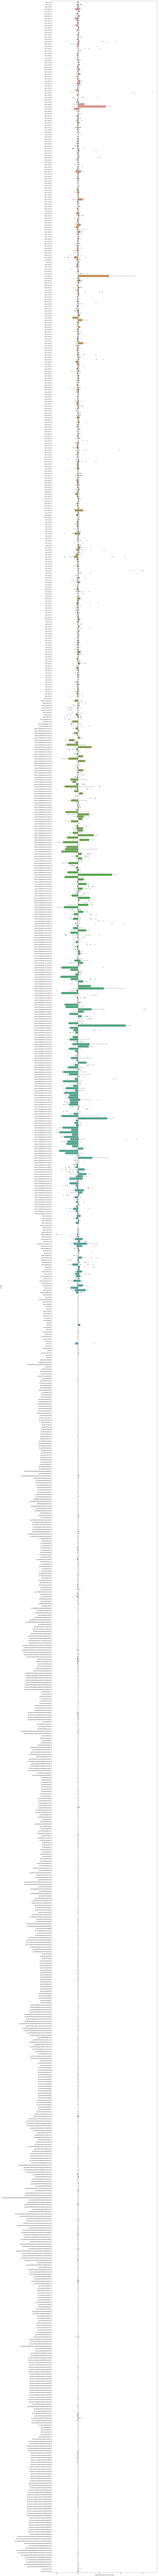

In [4]:
plt.figure(figsize=(20, 500))
sns.boxplot(y='variable',x='response_max_spire_auto_luxury_model',data=coeff)

## 1.2 Find top n variable of a model and check if they are shared among other models

In [5]:
model_median = pd.pivot_table(coeff,index=['variable'],aggfunc=np.median)
model_list = model_median.columns.tolist()

In [6]:
# 10 most significant variables for model 
def top10 (col_name):
    '''find top 10 variables of a model'''
    model = model_median.sort_index(
        by=[col_name],ascending=False)
    model = model.reset_index()
    model_top_10 = model.iloc[np.r_[0:5,-5:0],]
    
    return model_top_10

# 20 most significant variables for model 
def top20 (col_name):
    '''find top 20 variables of a model'''
    model = model_median.sort_index(
        by=[col_name],ascending=False)
    model = model.reset_index()
    model_top_20 = model.iloc[np.r_[0:10,-10:0],]
    
    return model_top_20

/Users/li/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """


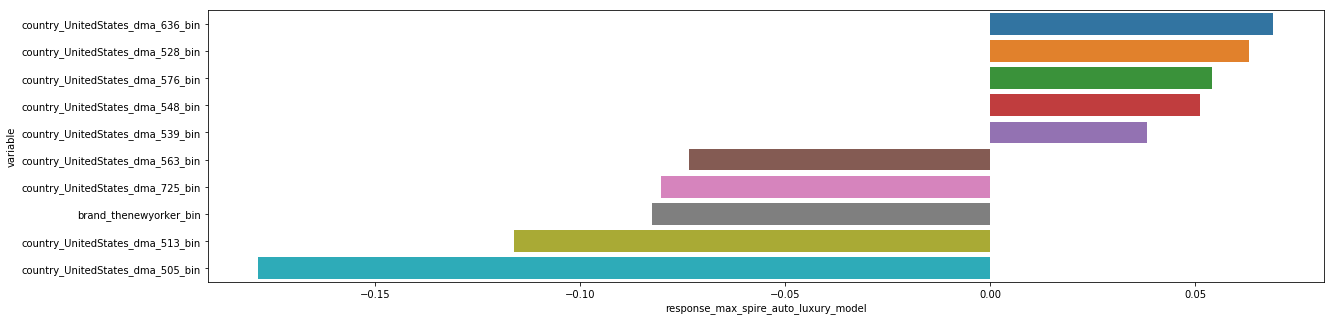

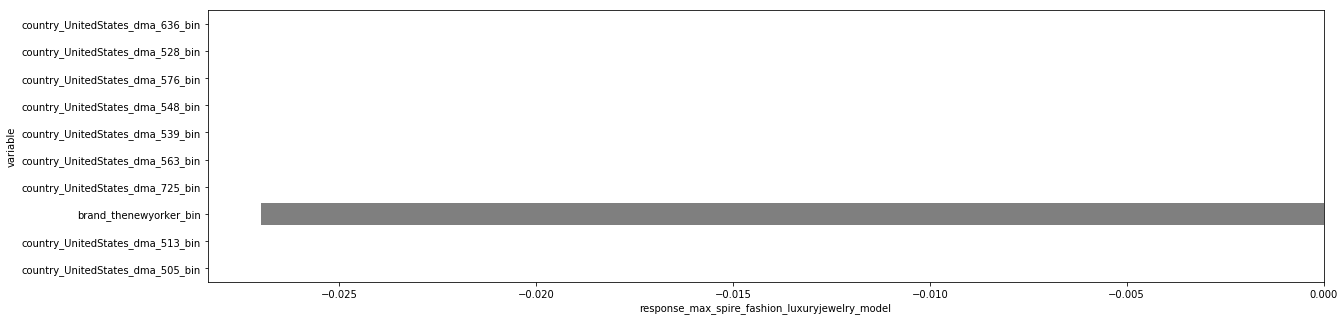

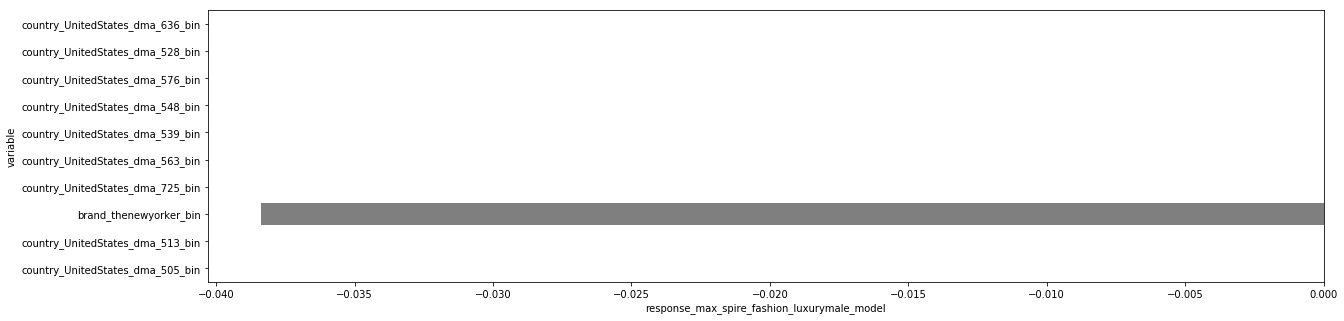

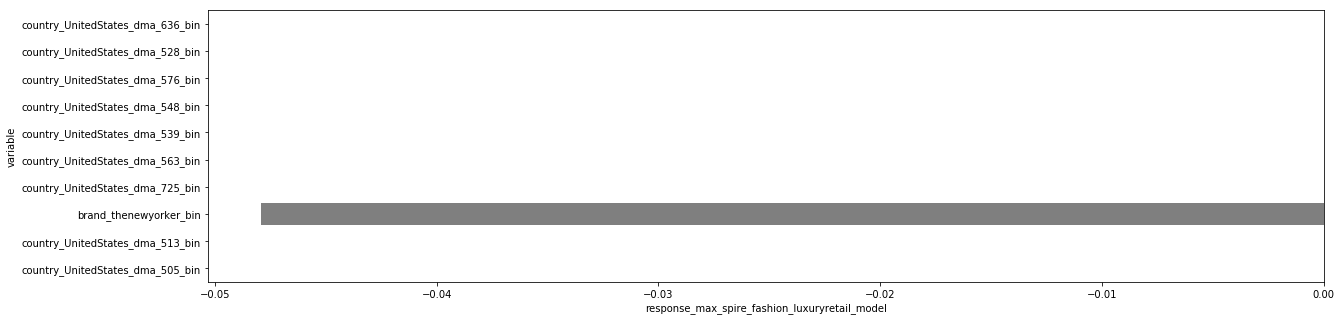

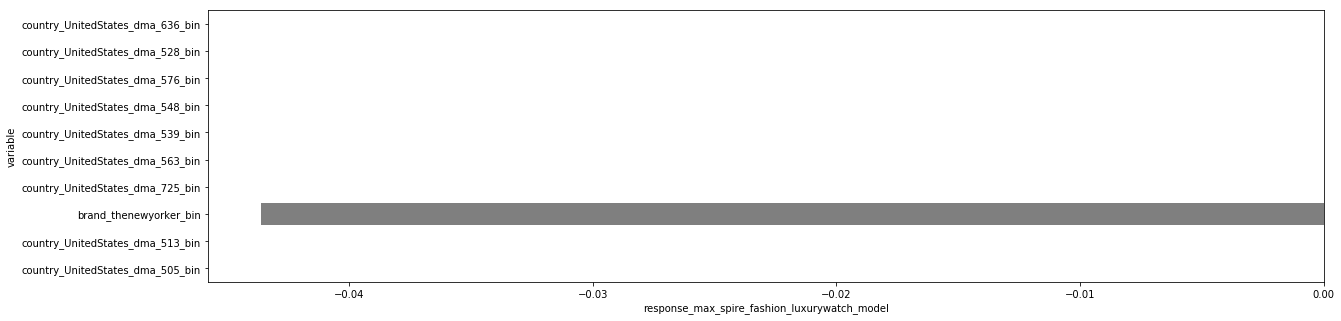

In [7]:
model_1_top_10 = top10(model_list[0])
for i in range(5):
    plt.figure(figsize = (20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_1_top_10)

In [8]:
model_1_top_10

variable  response_max_spire_auto_luxury_model  \
0     country_UnitedStates_dma_636_bin                              0.068960   
1     country_UnitedStates_dma_528_bin                              0.063145   
2     country_UnitedStates_dma_576_bin                              0.054200   
3     country_UnitedStates_dma_548_bin                              0.051281   
4     country_UnitedStates_dma_539_bin                              0.038346   
1103  country_UnitedStates_dma_563_bin                             -0.073549   
1104  country_UnitedStates_dma_725_bin                             -0.080152   
1105            brand_thenewyorker_bin                             -0.082473   
1106  country_UnitedStates_dma_513_bin                             -0.116195   
1107  country_UnitedStates_dma_505_bin                             -0.178492   

      response_max_spire_fashion_luxuryjewelry_model  \
0                                           0.000000   
1                                           0.000000   
2                                           0.000000   
3                                           0.000000   
4                                           0.000000   
1103                                        0.000000   
1104                                        0.000000   
1105                                       -0.026991   
1106                                        0.000000   
1107                                        0.000000   

      response_max_spire_fashion_luxurymale_model  \
0                                        0.000000   
1                                        0.000000   
2                                        0.000000   
3                                        0.000000   
4                                        0.000000   
1103                                     0.000000   
1104                                     0.000000   
1105                                    -0.038391   
1106                                     0.000000   
1107                                     0.000000   

      response_max_spire_fashion_luxuryretail_model  \
0                                          0.000000   
1                                          0.000000   
2                                          0.000000   
3                                          0.000000   
4                                          0.000000   
1103                                       0.000000   
1104                                       0.000000   
1105                                      -0.047933   
1106                                       0.000000   
1107                                       0.000000   

      response_max_spire_fashion_luxurywatch_model  
0                                         0.000000  
1                                         0.000000  
2                                         0.000000  
3                                         0.000000  
4                                         0.000000  
1103                                      0.000000  
1104                                      0.000000  
1105                                     -0.043633  
1106                                      0.000000  
1107                                      0.000000

C:\Users\amosg\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  from ipykernel import kernelapp as app


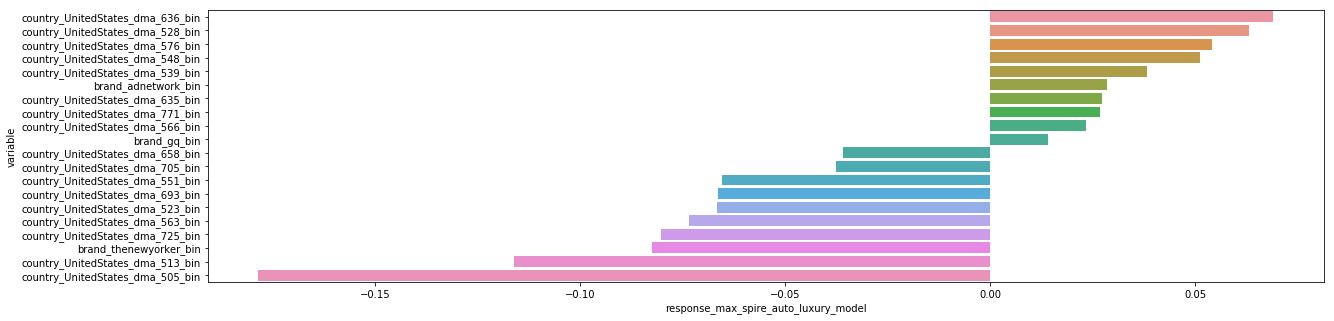

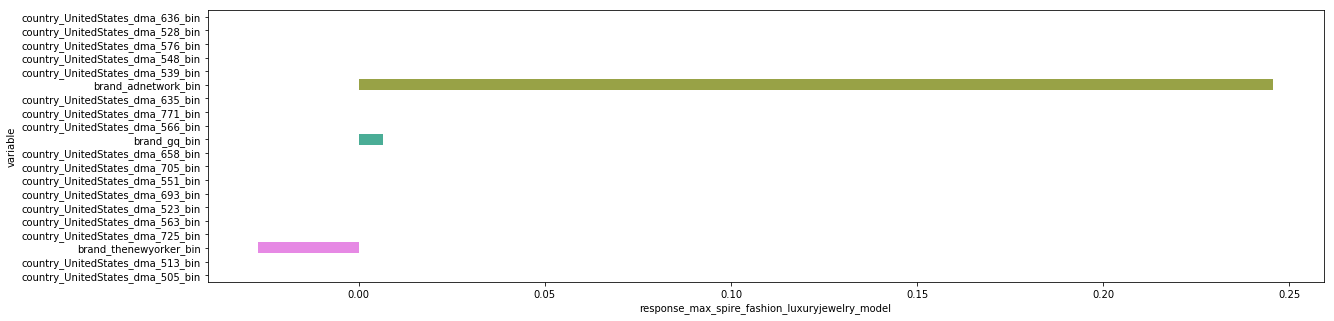

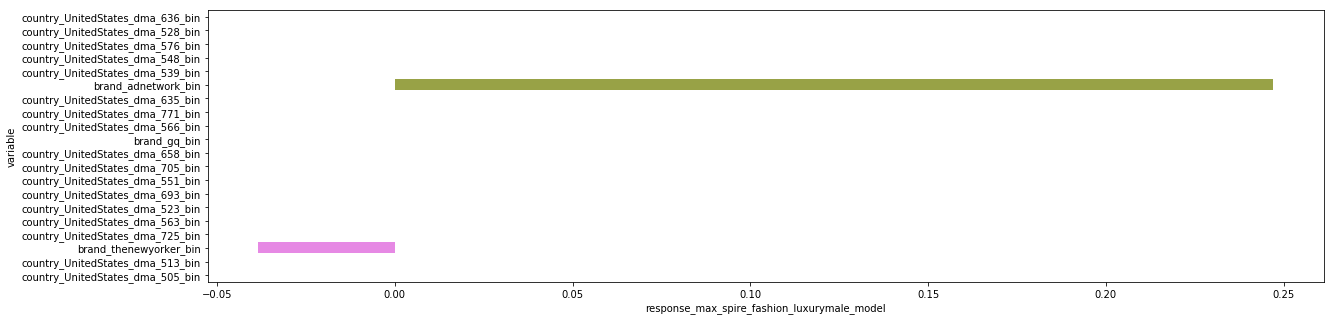

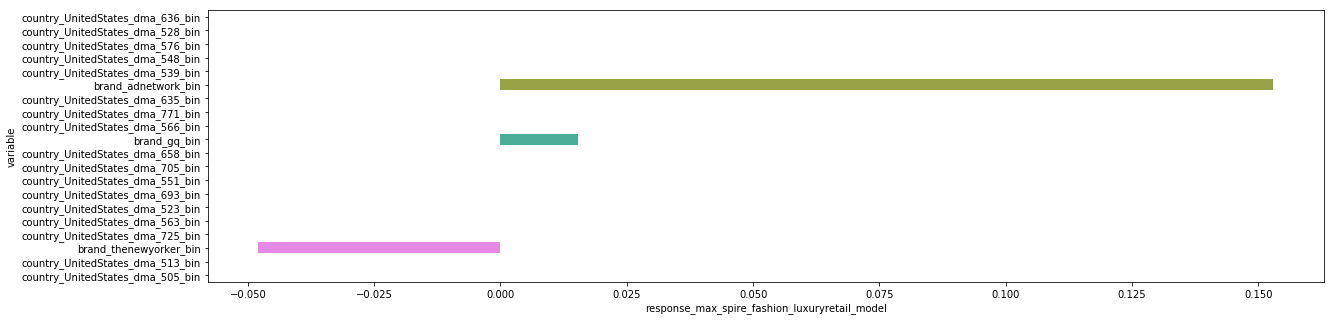

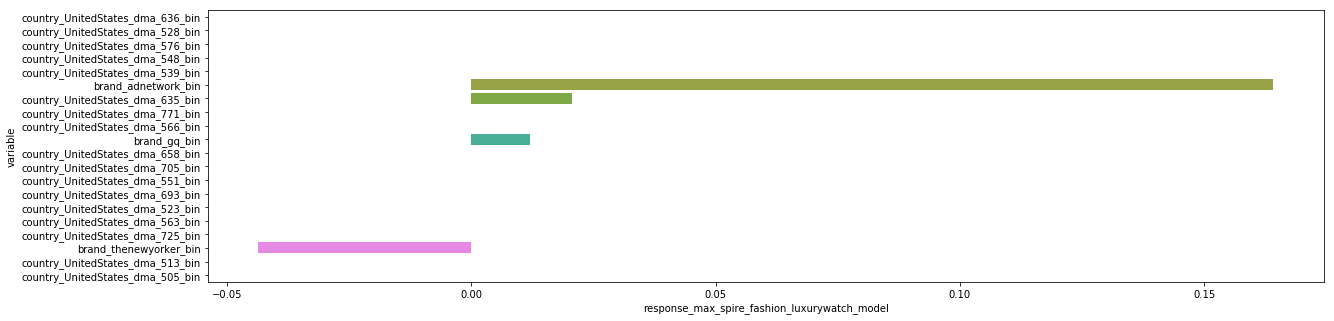

In [9]:
model_1_top_20 = top20(model_list[0])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_1_top_20)

C:\Users\amosg\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """


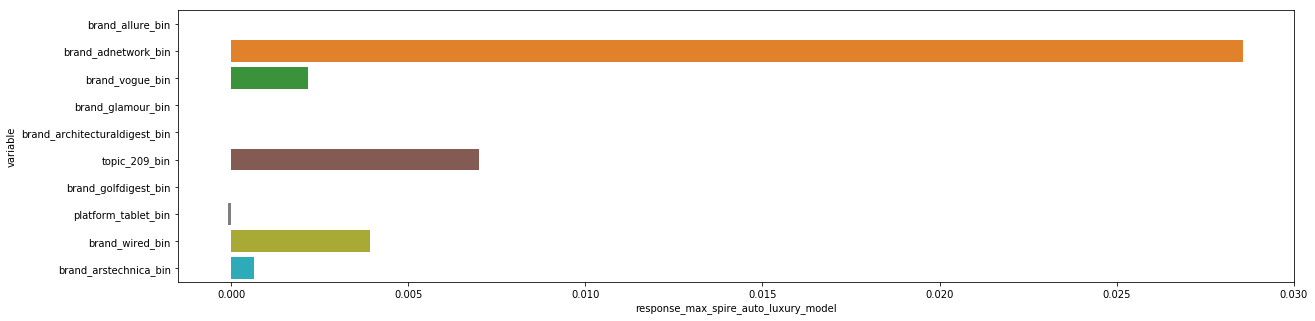

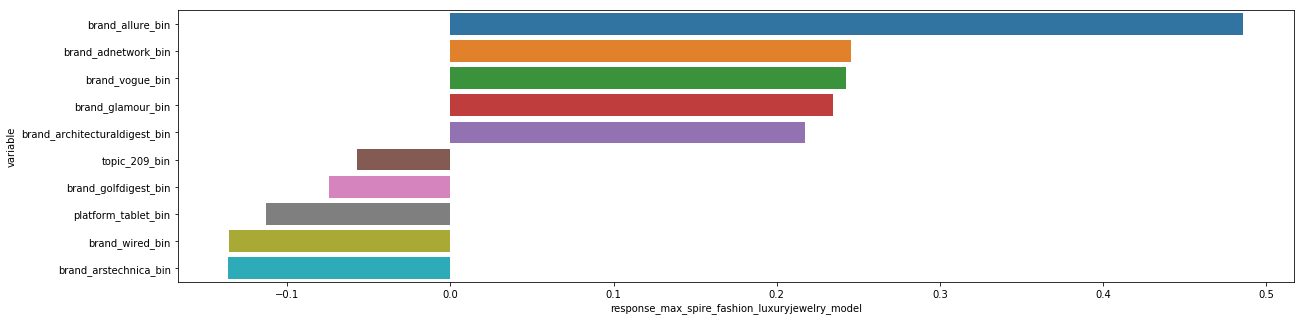

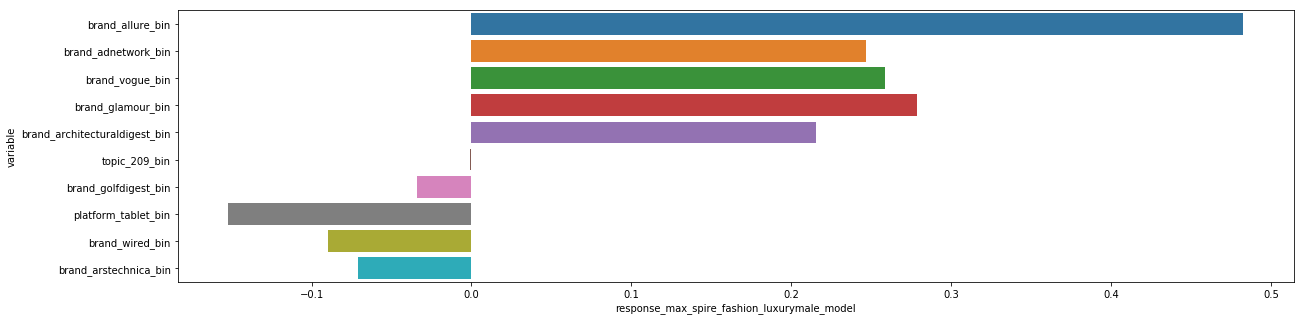

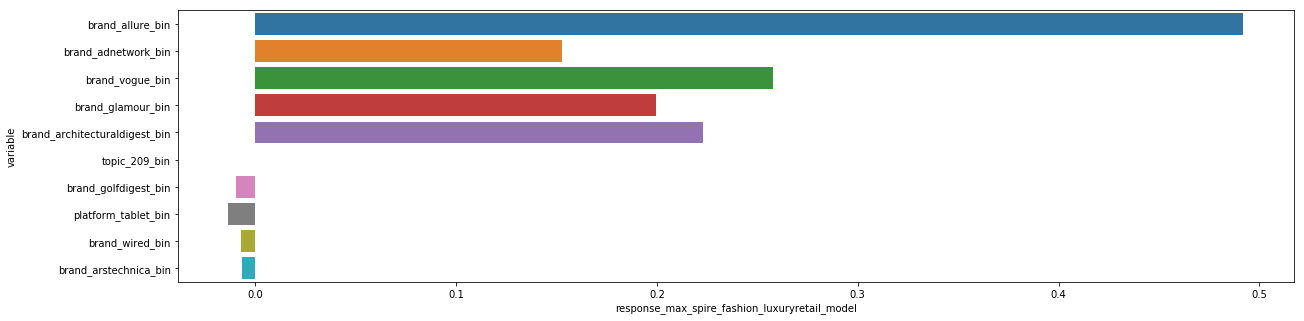

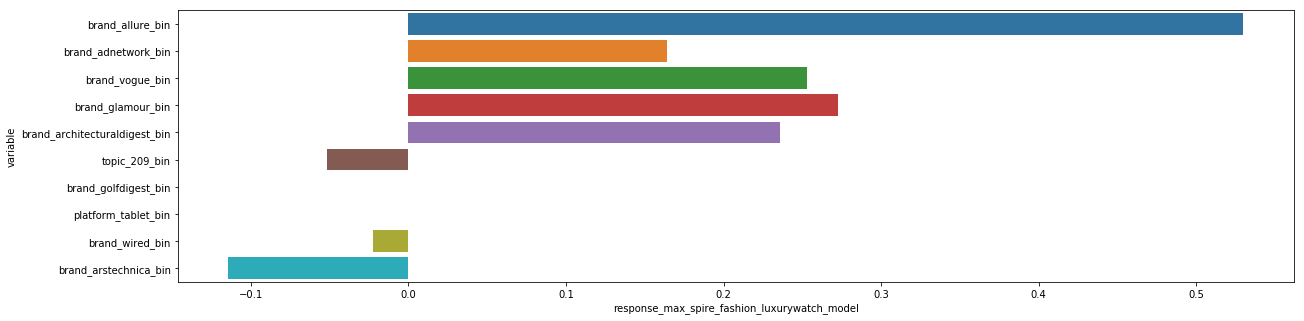

In [10]:
model_2_top_10 = top10(model_list[1])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_2_top_10)

C:\Users\amosg\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  from ipykernel import kernelapp as app


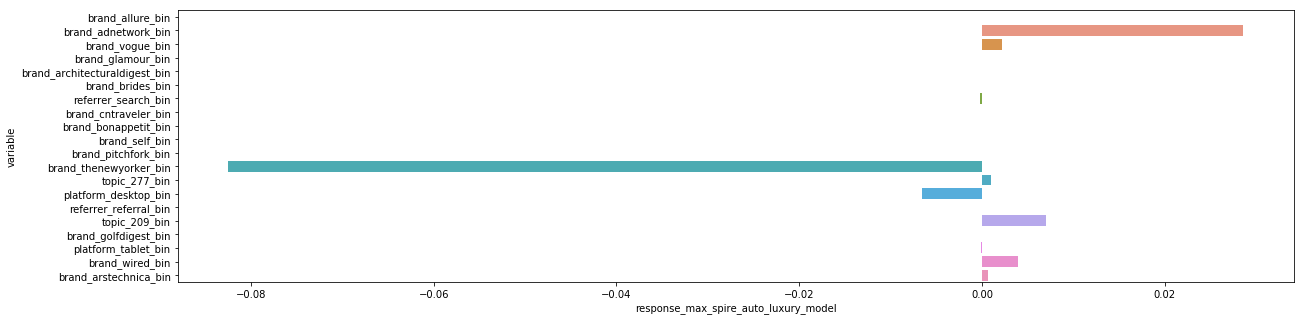

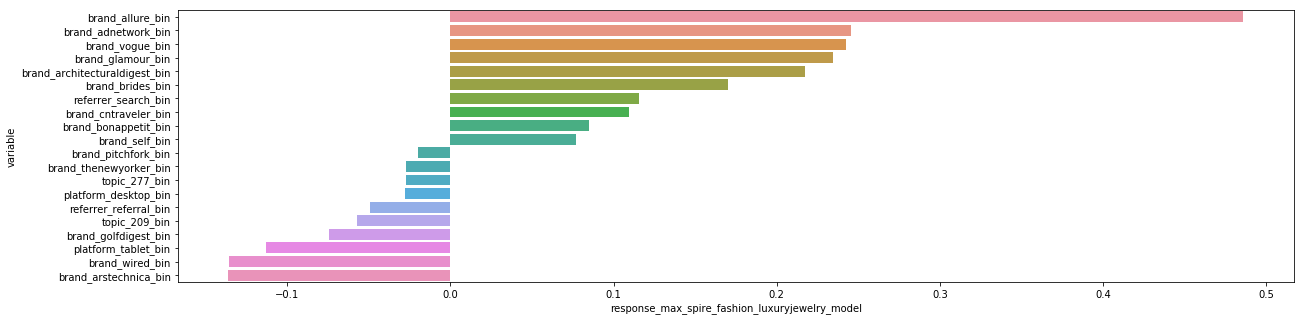

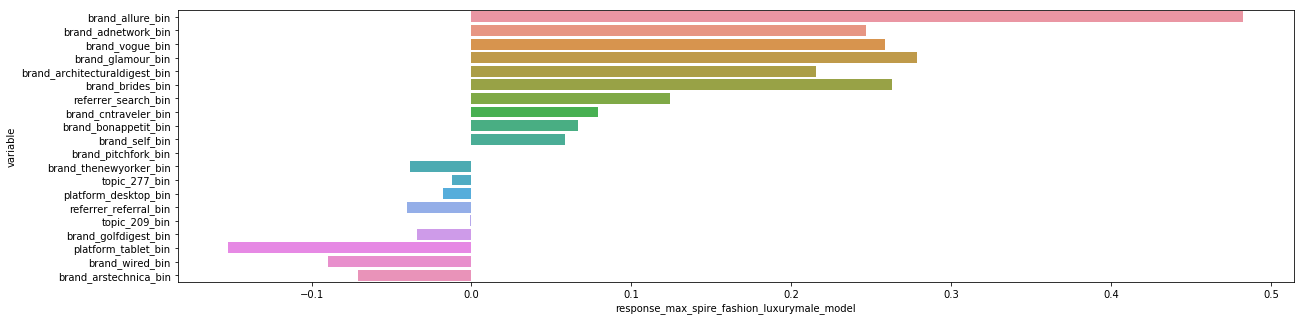

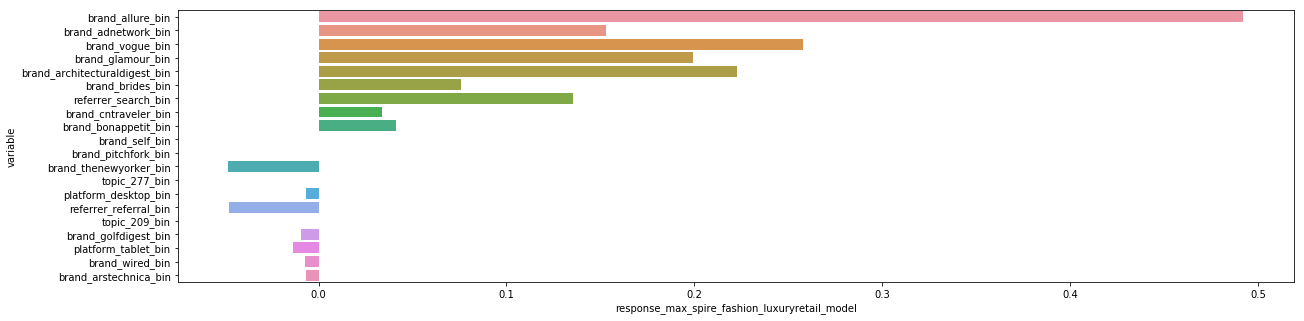

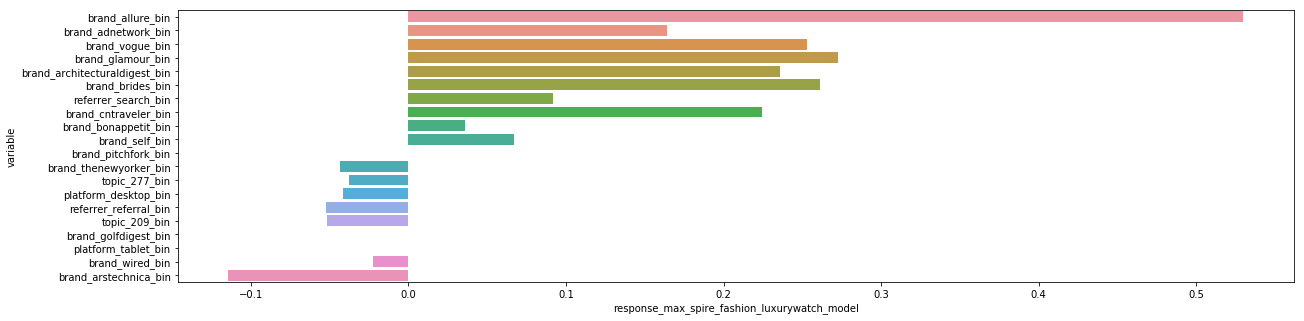

In [11]:
model_2_top_20 = top20(model_list[1])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_2_top_20)

C:\Users\amosg\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """


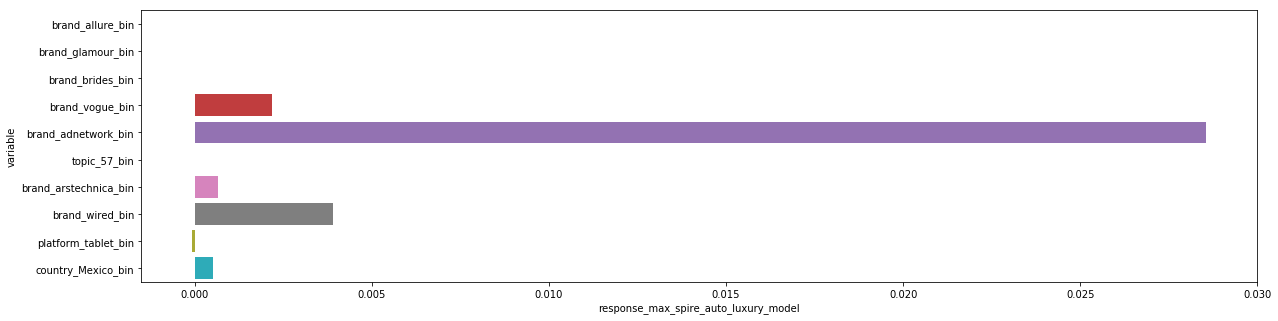

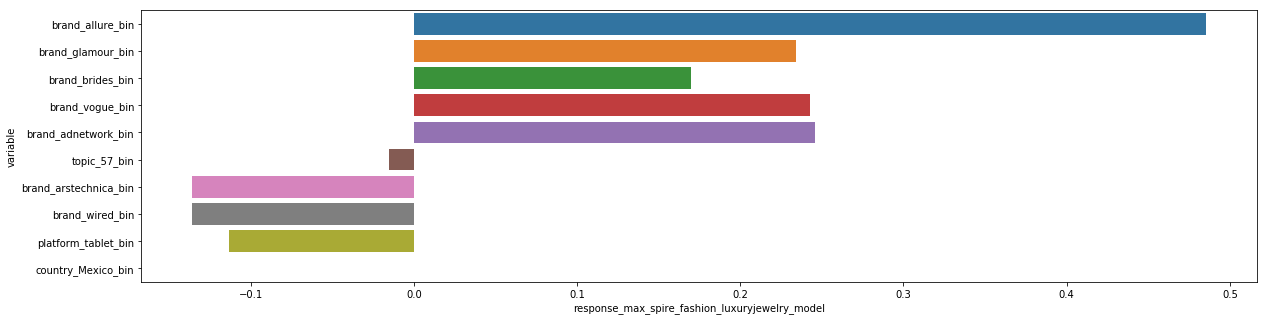

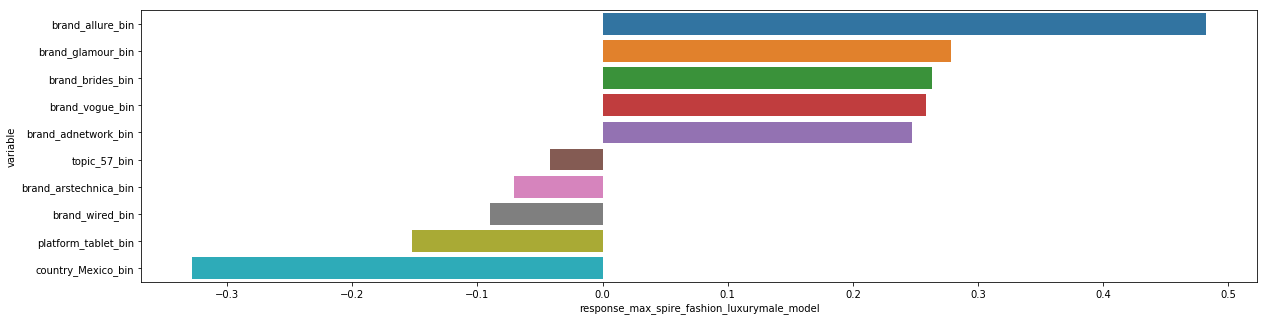

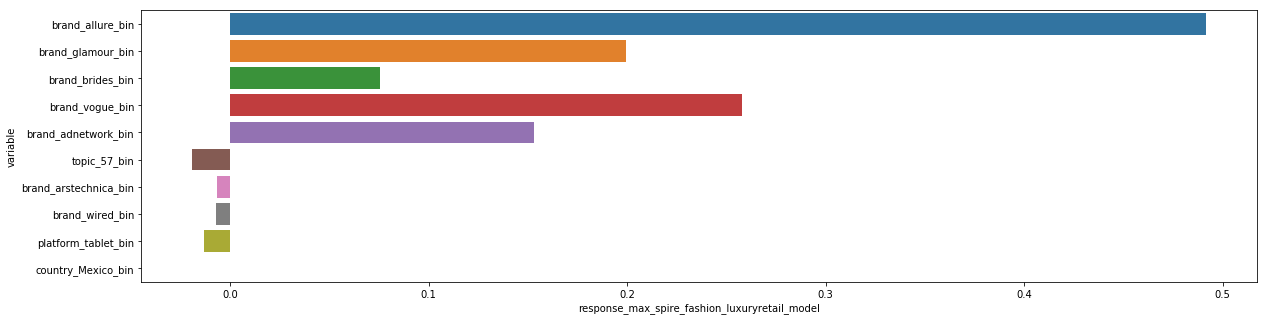

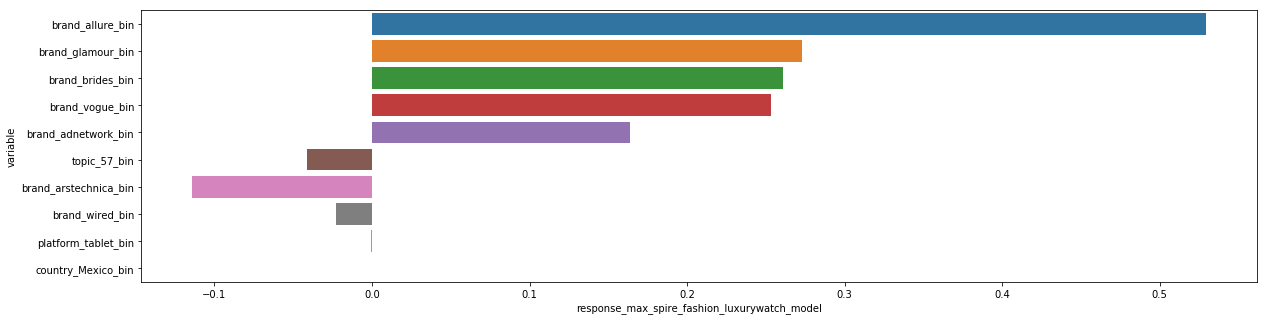

In [12]:
model_3_top_10 = top10(model_list[2])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_3_top_10)

C:\Users\amosg\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  from ipykernel import kernelapp as app


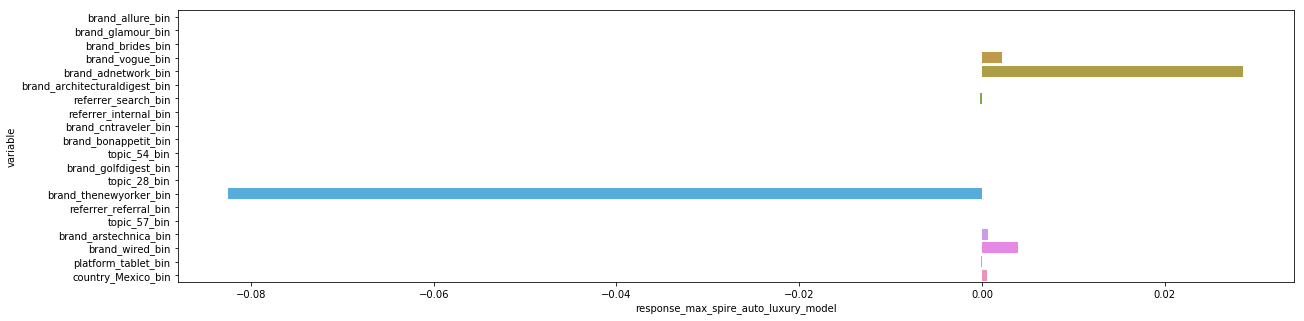

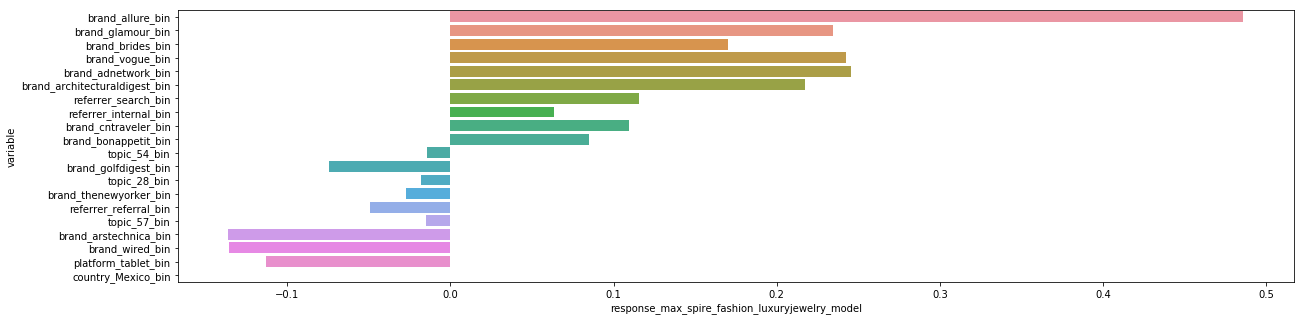

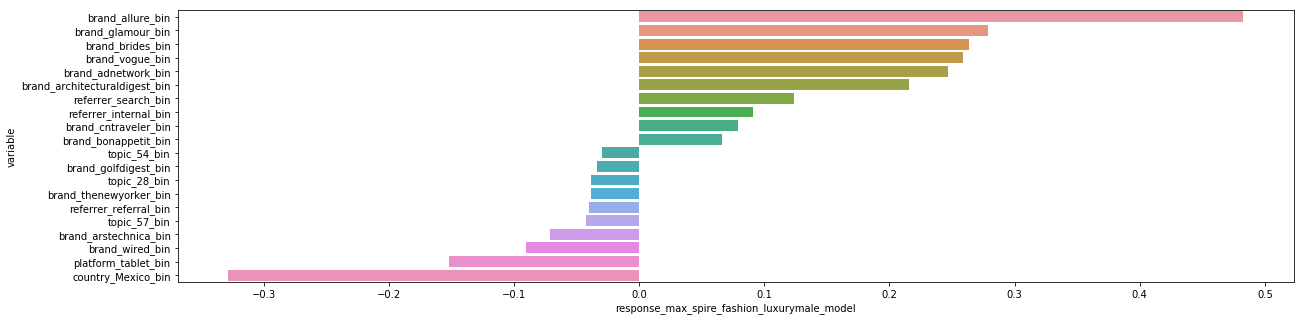

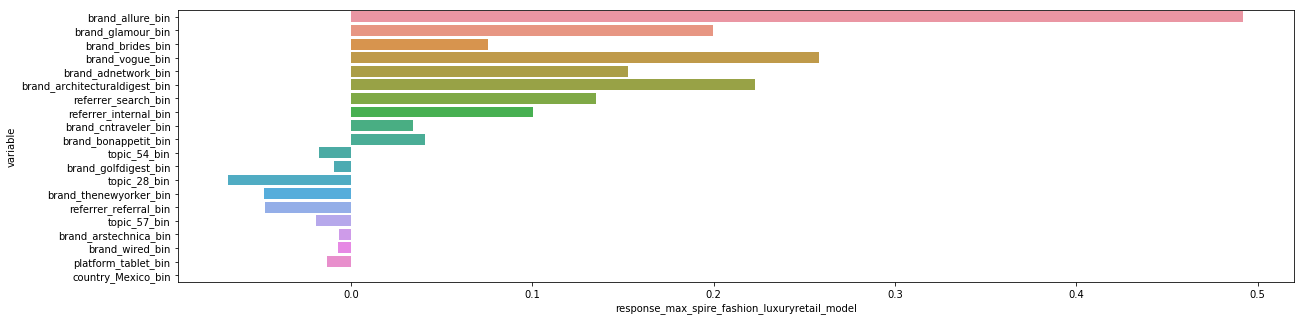

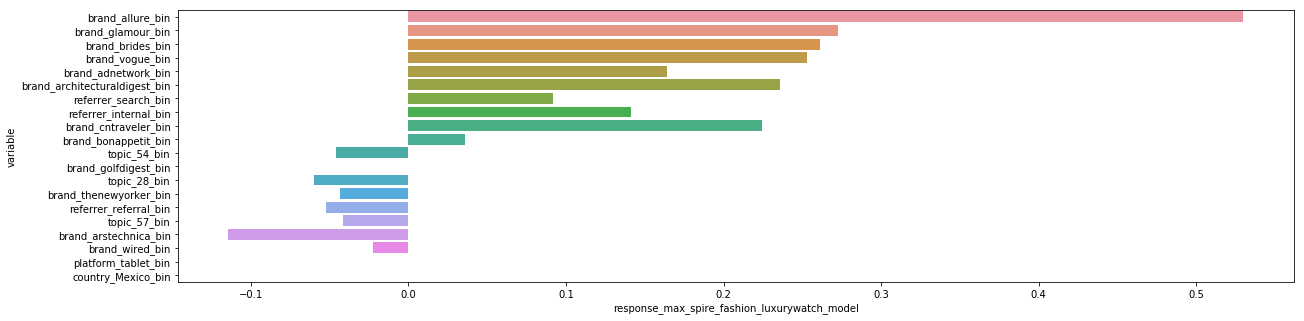

In [13]:
model_3_top_20 = top20(model_list[2])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_3_top_20)

C:\Users\amosg\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """


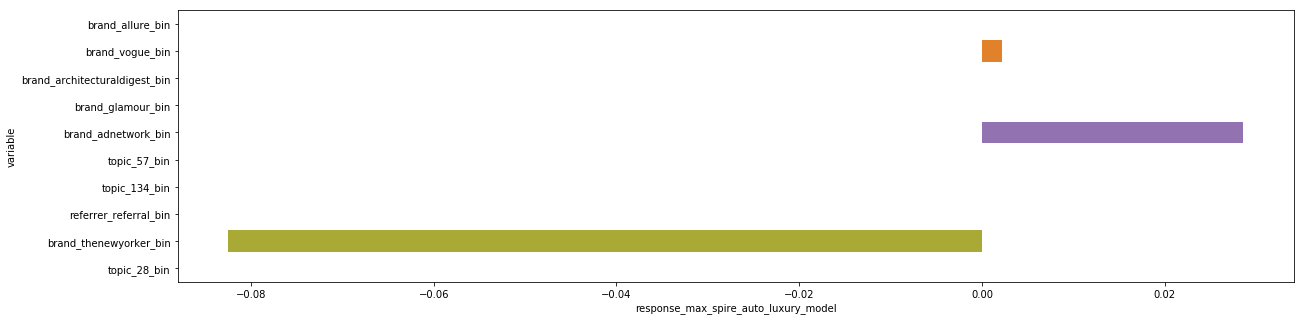

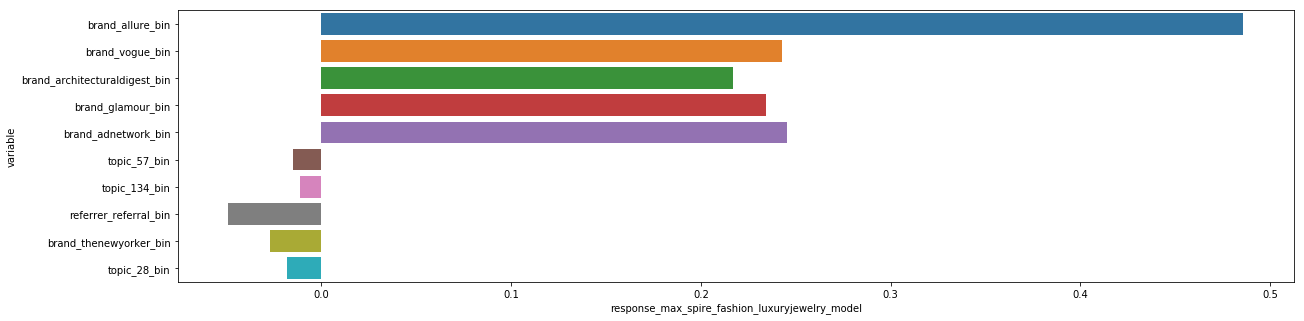

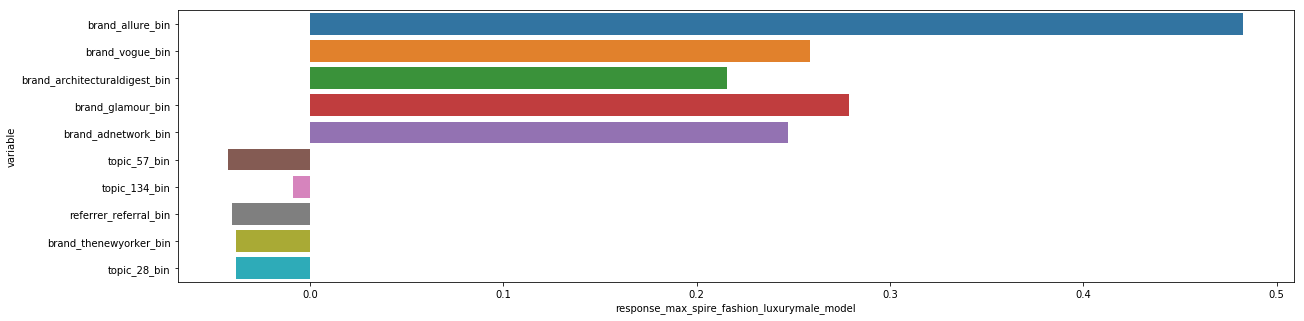

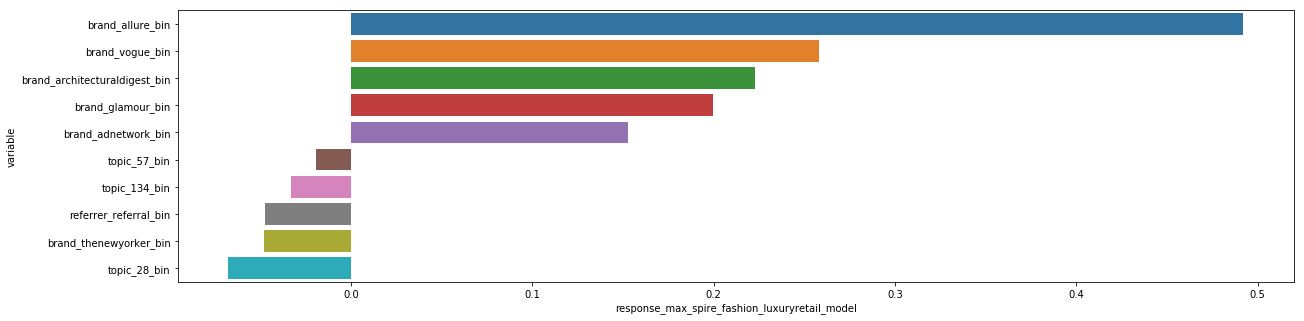

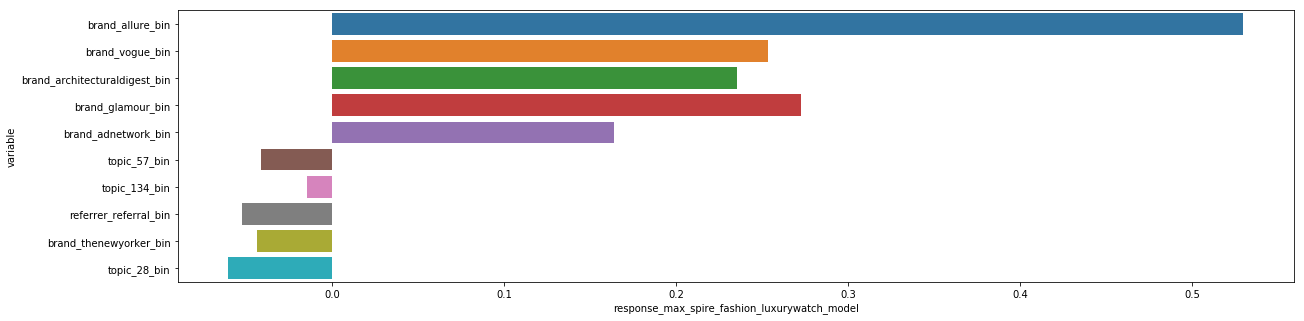

In [14]:
model_4_top_10 = top10(model_list[3])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_4_top_10)

C:\Users\amosg\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  from ipykernel import kernelapp as app


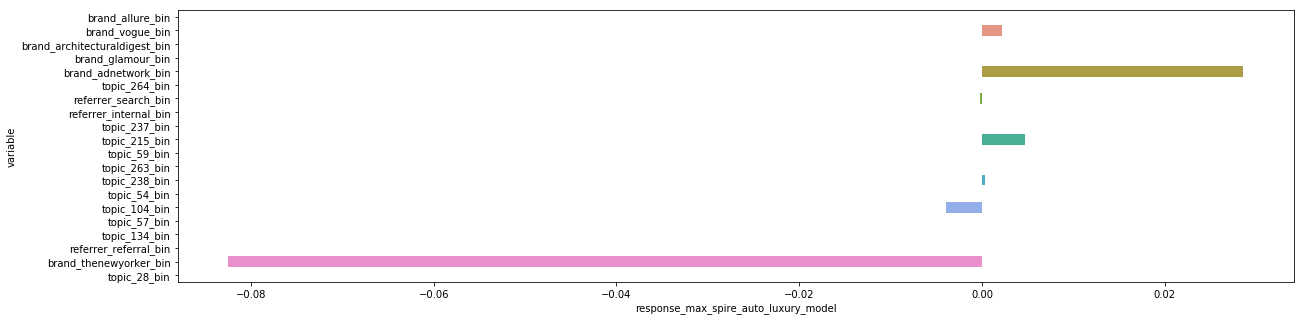

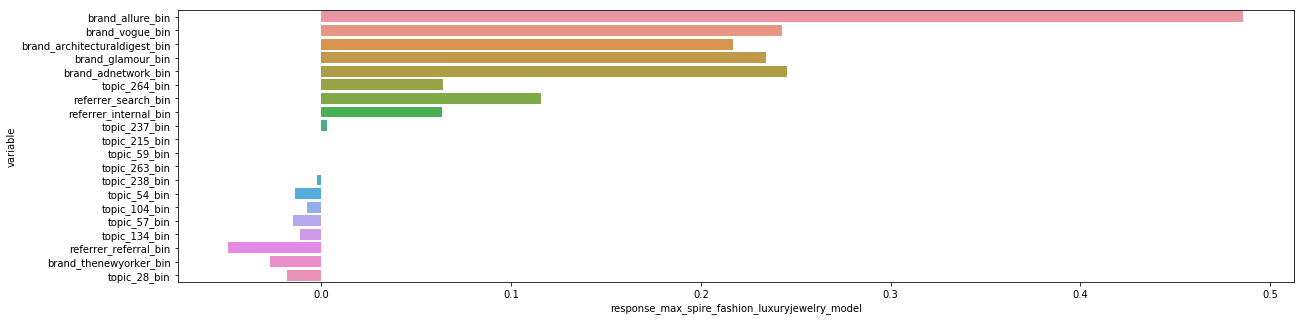

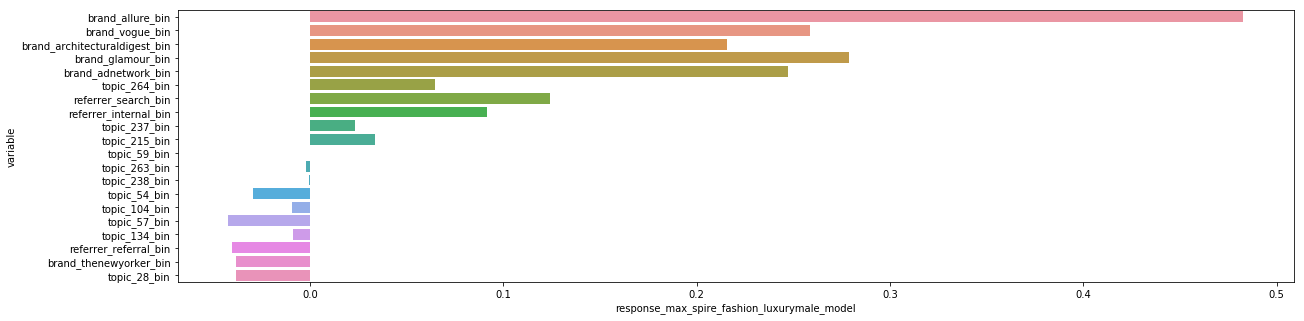

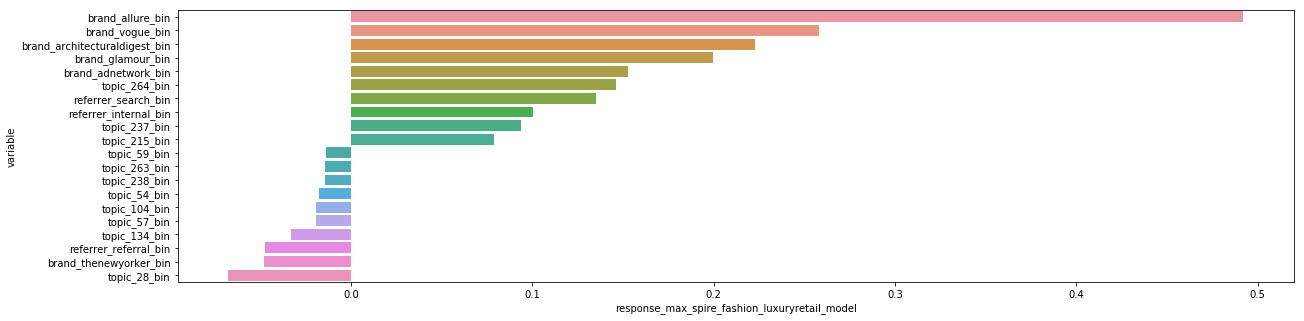

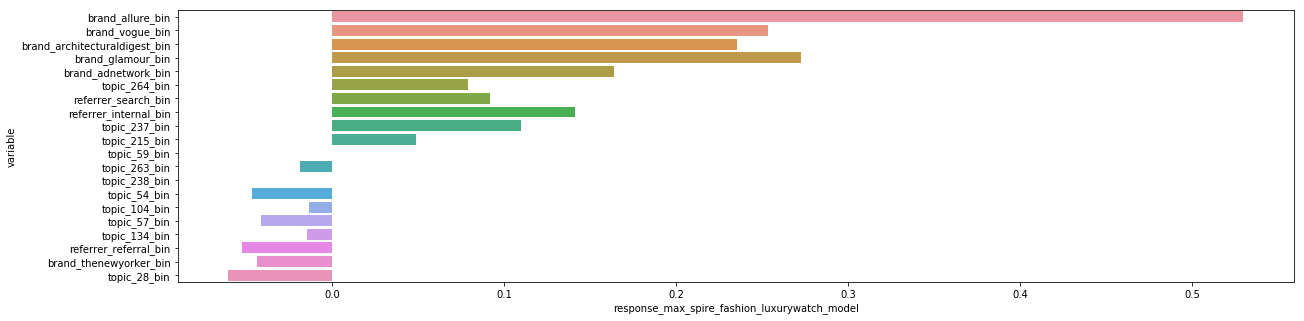

In [15]:
model_4_top_20 = top20(model_list[3])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_4_top_20)

C:\Users\amosg\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """


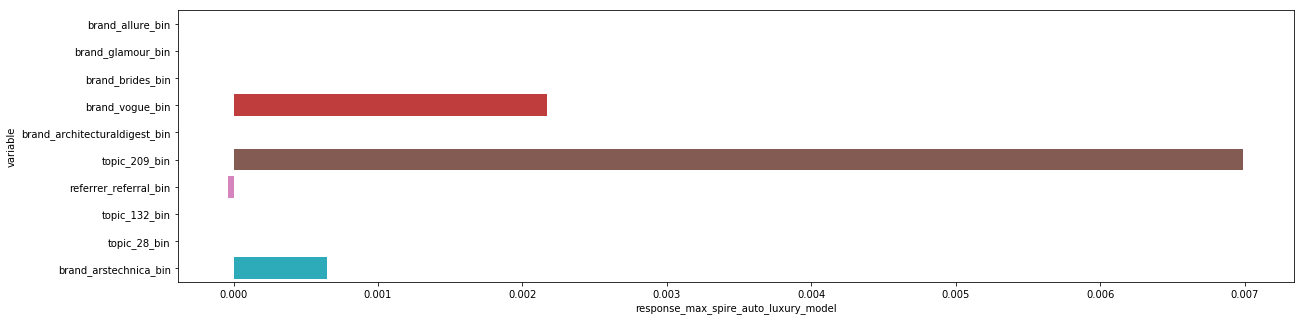

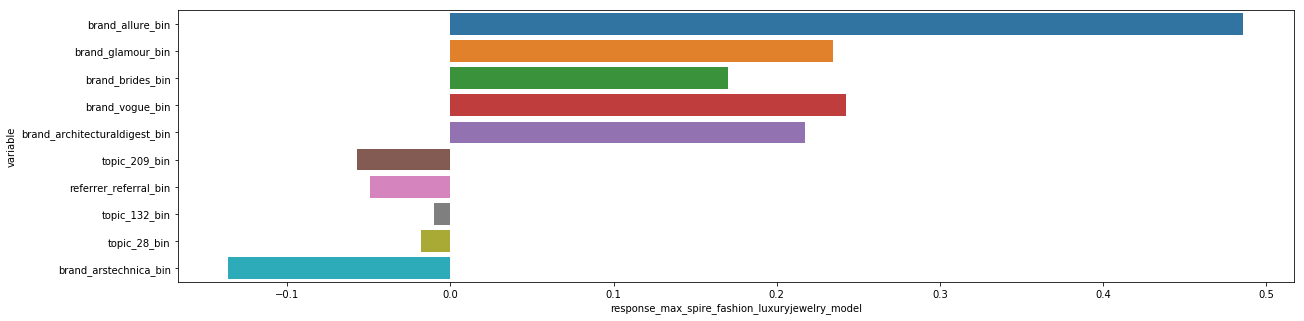

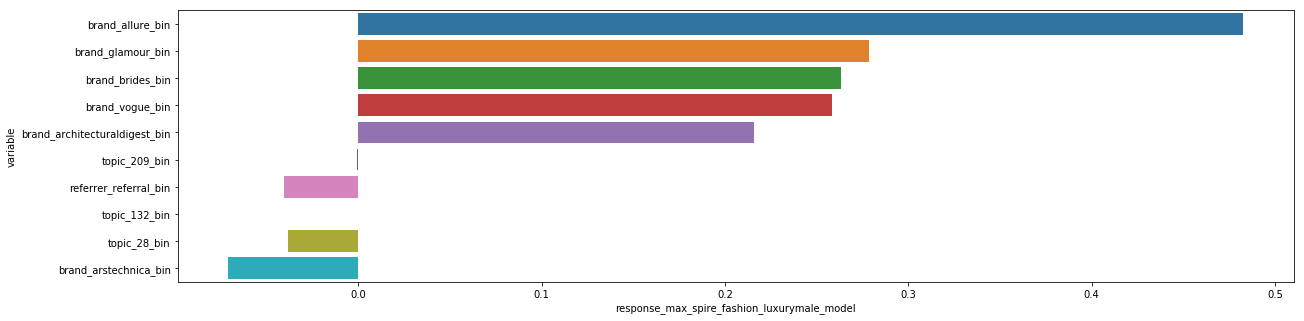

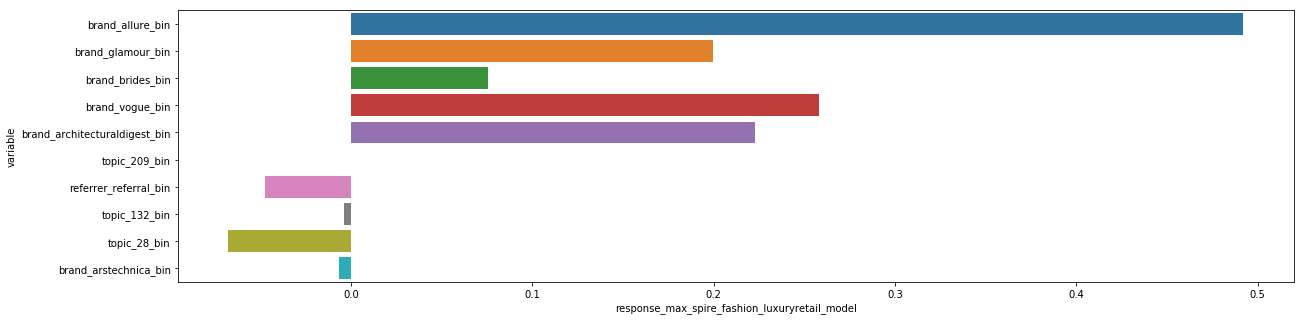

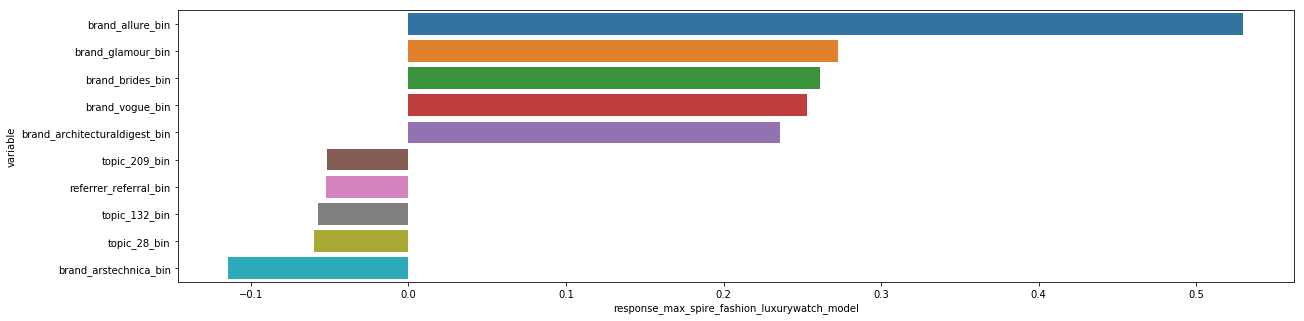

In [16]:
model_5_top_10 = top10(model_list[4])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_5_top_10)

C:\Users\amosg\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  from ipykernel import kernelapp as app


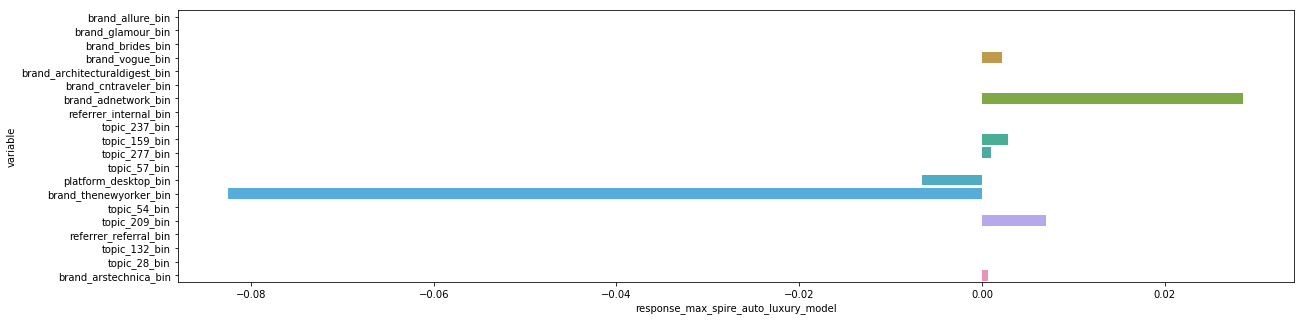

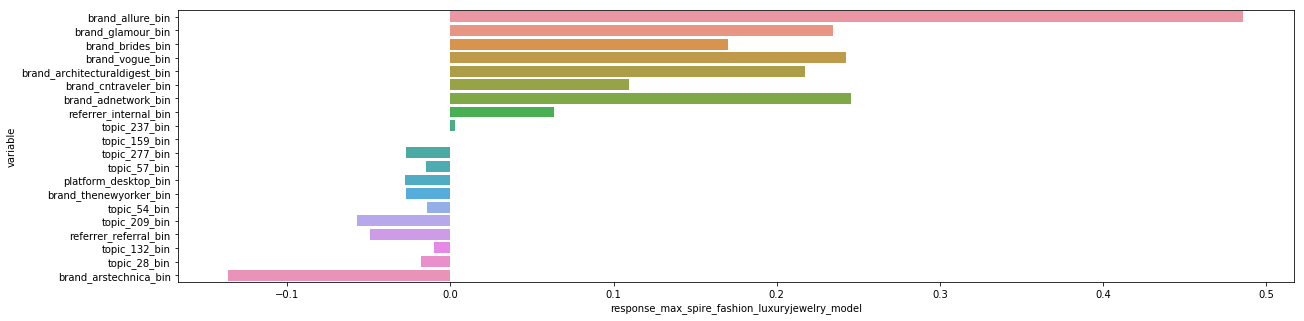

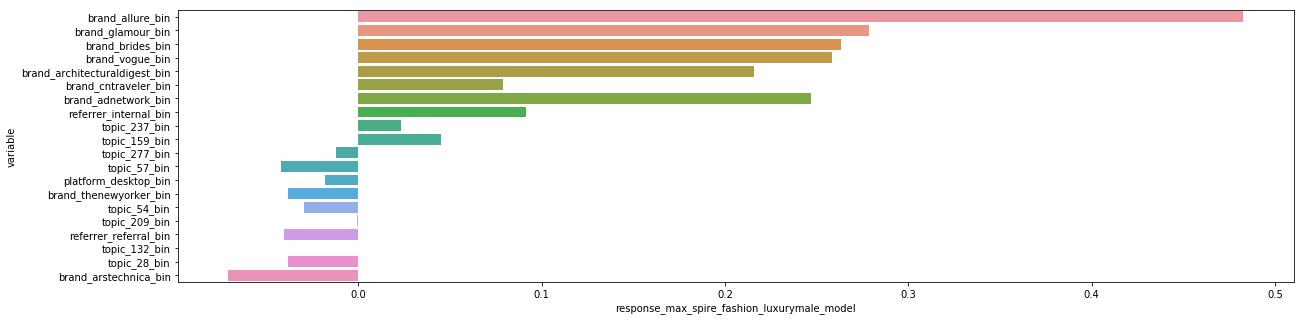

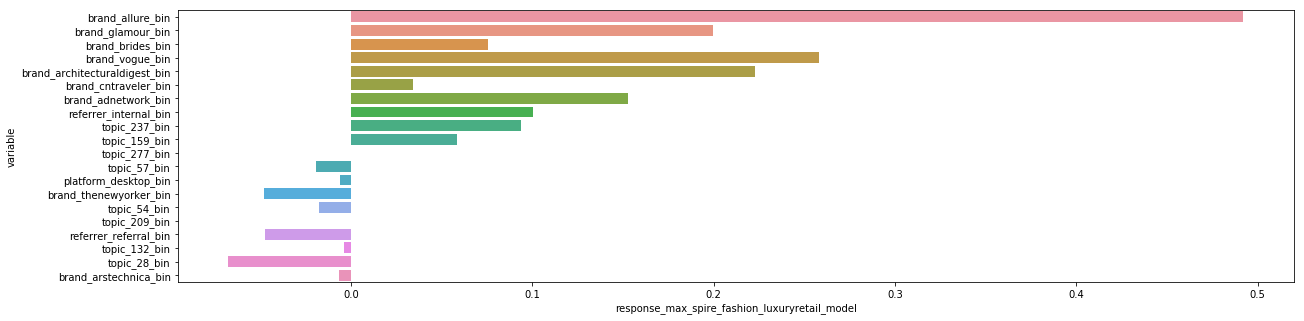

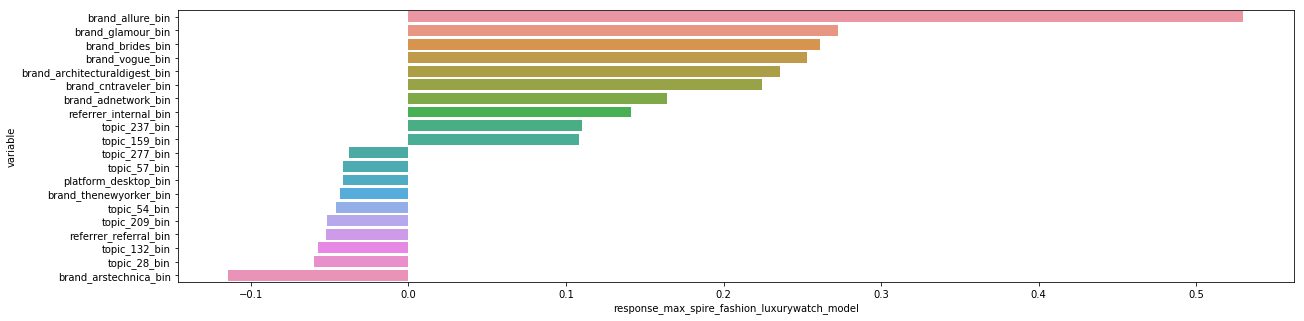

In [17]:
model_5_top_20 = top20(model_list[4])
for i in range(5):
    plt.figure(figsize=(20, 5))
    sns.barplot(y='variable',x=model_list[i],data=model_5_top_20)

We can see model 1 doesn’t share much common variables with the rest. Most of the significant variables of model 1 are zeros for the rest. On the other side, model 2 share some more common variables with model 3 to 5. Another interesting finding is that some variables have opposite impact on models, that it has positive impact on model 1 while negative impact on model 2.

We can find more common variables in top 20 graphs. Also, it seems that model 2-5 share a lot of common variables and model 1 is a lot different from the rest 4 models.

# 2 Coefficient Over Time

## 2.1 One variable coefficient in one model over time

In [18]:
model_list = coeff.columns.tolist()
model_list = model_list[2:]
model_list

['response_max_spire_auto_luxury_model',
 'response_max_spire_fashion_luxuryjewelry_model',
 'response_max_spire_fashion_luxurymale_model',
 'response_max_spire_fashion_luxuryretail_model',
 'response_max_spire_fashion_luxurywatch_model']

In [ ]:
def extract_one_model(model_name):
    '''extract coefficients of one model from the whole dataset''' 
    model = pd.pivot_table(coeff,values=[model_name],index=['Date'],columns=['variable'])
    flattened_model = pd.DataFrame(model.to_records())
    flattened_model.columns = flattened_model.columns.map(lambda x:x[len(model_name)+6:-2])
    flattened_model = flattened_model.rename(columns={'':'Date'})
    return flattened_model

In [ ]:
model_1 = extract_one_model(model_list[0])
model_2 = extract_one_model(model_list[1])
model_3 = extract_one_model(model_list[2])
model_4 = extract_one_model(model_list[3])
model_5 = extract_one_model(model_list[4])

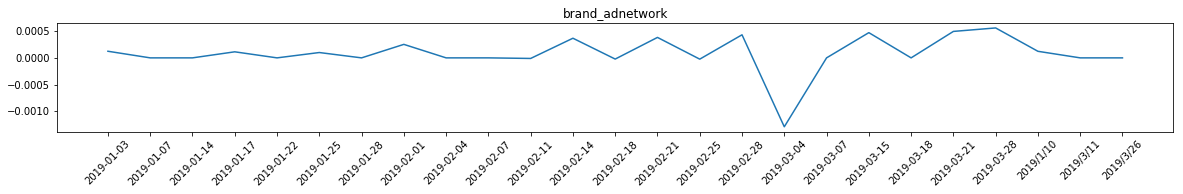

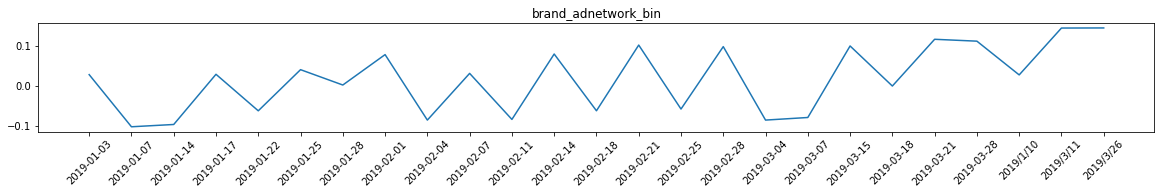

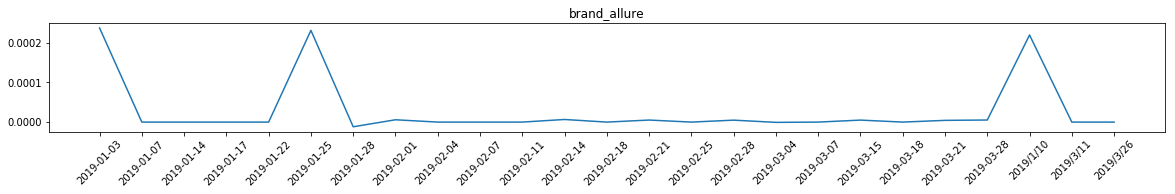

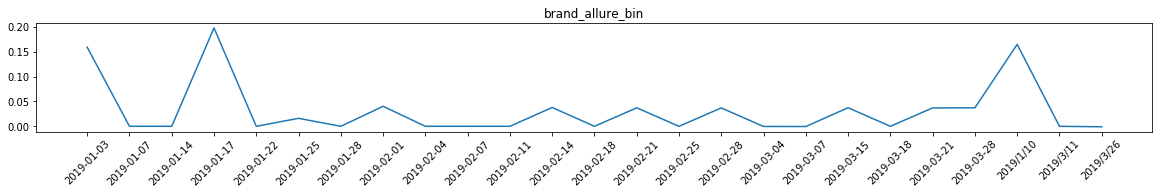

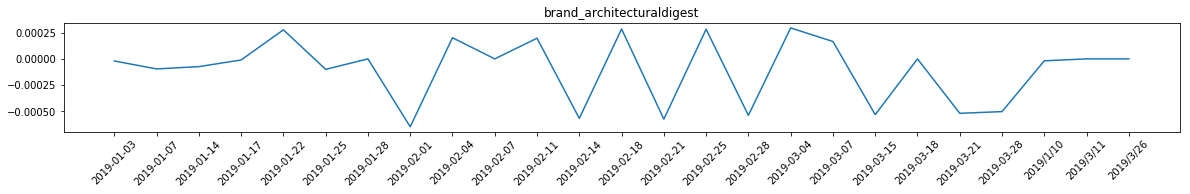

In [ ]:
# first 5 coefficient of model 1 change over time
for i in range(5):
    plt.figure(figsize=(20, 2))
    plt.plot(model_1.iloc[:,0],model_1.iloc[:,i+1])
    plt.xticks(rotation=45)
    plt.title(model_1.columns[i+1]) 

The first one is stable and smooth and the second one fluctuates a lot along time. While we observed there’s a significant drop for both of them in March 2019. It could be an important signal for us to do further analysis by taking deeper look at other features in models at the same time. 

## 2.2 Comparison of the same variable trend over time but among different models

Text(0.5, 1.0, 'Brand_allure_bin')

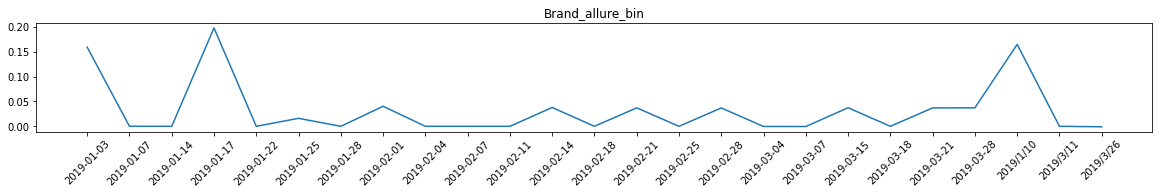

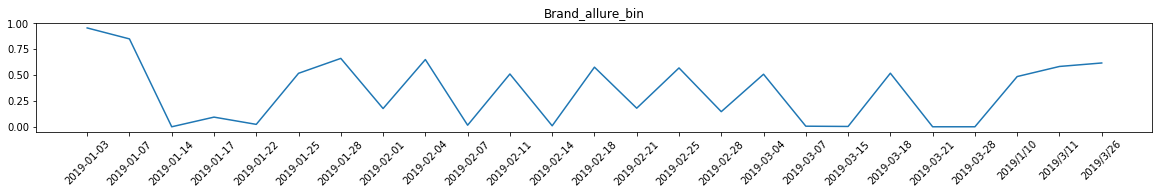

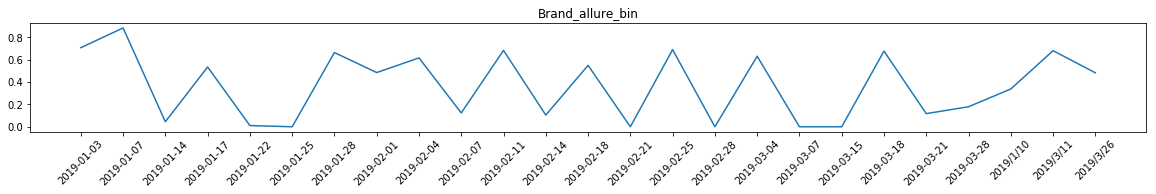

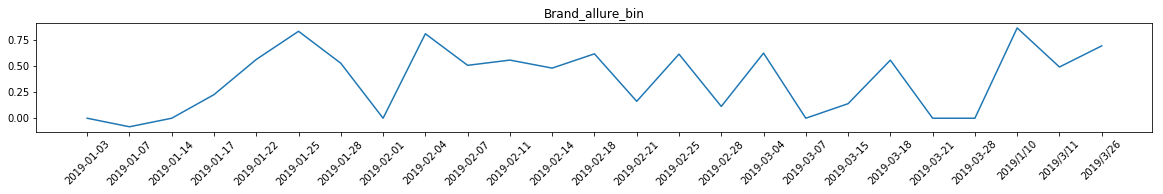

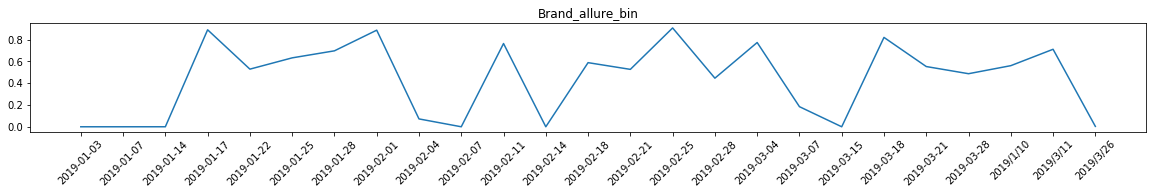

In [ ]:
plt.figure(figsize=(20, 2))
plt.plot(model_1.iloc[:,0],model_1['brand_allure_bin'])
plt.xticks(rotation=45)
plt.title('Brand_allure_bin') 
plt.figure(figsize=(20, 2))
plt.plot(model_2.iloc[:,0],model_2['brand_allure_bin'])
plt.xticks(rotation=45)
plt.title('Brand_allure_bin') 
plt.figure(figsize=(20, 2))
plt.plot(model_3.iloc[:,0],model_3['brand_allure_bin'])
plt.xticks(rotation=45)
plt.title('Brand_allure_bin') 
plt.figure(figsize=(20, 2))
plt.plot(model_4.iloc[:,0],model_4['brand_allure_bin'])
plt.xticks(rotation=45)
plt.title('Brand_allure_bin') 
plt.figure(figsize=(20, 2))
plt.plot(model_5.iloc[:,0],model_5['brand_allure_bin'])
plt.xticks(rotation=45)
plt.title('Brand_allure_bin') 

we found that there are similarities between model 2 to 5, while the trend of model 1 is a lot different from the rest.

# 3 Check AUC

Import data

In [ ]:
#prepare auc tables
csv_dir = 'auc_table/'
file_list = [os.path.join(csv_dir, f) for f in os.listdir(csv_dir)]
auc = []
for l in file_list:
    data = pd.read_csv(l)
    auc.append(data)
auc = pd.concat(auc)

In [ ]:
model_list_auc = auc.columns.tolist()
model_list_auc = model_list_auc[2:]
model_list_auc

['response_max_spire_auto_luxury_AUC',
 'response_max_spire_fashion_luxuryjewelry_AUC',
 'response_max_spire_fashion_luxurymale_AUC',
 'response_max_spire_fashion_luxuryretail_AUC',
 'response_max_spire_fashion_luxurywatch_AUC']

## 3.1 Draw auc changes over time

In [ ]:
auc = auc.sort_values(by="Date")
best_model = auc[auc.model == 'best model on full dataset']

In [ ]:
# auc plot of 5 models
for i in range(5):
    plt.figure(figsize=(20, 2))
    plt.plot(best_model.iloc[:,0],best_model[model_list_auc[i]])
    plt.xticks(rotation=45)
    plt.title(model_list_auc[i]) 

Taking the first model as an example, we can see most of the time, the model has pretty bad auc, which is around 0.6. And there are only 4 period of time when the model has a relatively better auc around 0.8.

## 3.2 Compare coefficients on days that have good auc and days that don't

In [ ]:
# select good auc 
model_1_good_auc = best_model[(best_model[model_list_auc[0]] >= 0.7)]
model_2_good_auc = best_model[(best_model[model_list_auc[1]] >= 0.7)]
model_3_good_auc = best_model[(best_model[model_list_auc[2]] >= 0.7)]
model_4_good_auc = best_model[(best_model[model_list_auc[3]] >= 0.7)]
model_5_good_auc = best_model[(best_model[model_list_auc[4]] >= 0.7)]

In [ ]:
variable_list = model_1.columns.tolist()
variable_list = variable_list[1:]

# prepare coeff of good auc dates
model_1_good_auc_coeff = pd.DataFrame(model_1)
model_2_good_auc_coeff = pd.DataFrame(model_2)
model_3_good_auc_coeff = pd.DataFrame(model_3)
model_4_good_auc_coeff = pd.DataFrame(model_4)
model_5_good_auc_coeff = pd.DataFrame(model_5)

model_1 = extract_one_model(model_list[0])
model_2 = extract_one_model(model_list[1])
model_3 = extract_one_model(model_list[2])
model_4 = extract_one_model(model_list[3])
model_5 = extract_one_model(model_list[4])

model_1_good_auc_coeff.loc[~model_1_good_auc_coeff.Date.isin(model_1_good_auc.Date),variable_list] = -5
model_2_good_auc_coeff.loc[~model_2_good_auc_coeff.Date.isin(model_2_good_auc.Date),variable_list] = -5
model_3_good_auc_coeff.loc[~model_3_good_auc_coeff.Date.isin(model_3_good_auc.Date),variable_list] = -5
model_4_good_auc_coeff.loc[~model_4_good_auc_coeff.Date.isin(model_4_good_auc.Date),variable_list] = -5
model_5_good_auc_coeff.loc[~model_5_good_auc_coeff.Date.isin(model_5_good_auc.Date),variable_list] = -5

In [ ]:
#contrast coefficient of variable country_UnitedStates_dma_505_bin of good auc and that of not so good auc 
plt.figure(figsize=(20, 2))
plt.plot(model_1_good_auc_coeff.iloc[:,0],model_1_good_auc_coeff['country_UnitedStates_dma_505_bin'])
plt.xticks(rotation=45)
plt.title('coeff of good auc (model_1_country_UnitedStates_dma_505_bin)') 
plt.figure(figsize=(20, 2))
plt.plot(model_1.iloc[:,0],model_1['country_UnitedStates_dma_505_bin'])
plt.xticks(rotation=45)
plt.title('coeff of all auc (model_1_country_UnitedStates_dma_505_bin)') 

In [ ]:
#contrast coefficient brand_allure_bin in model 2 of good auc and that of not so good auc 
plt.figure(figsize=(20, 2))
plt.plot(model_2_good_auc_coeff.iloc[:,0],model_2_good_auc_coeff['brand_allure_bin'])
plt.xticks(rotation=45)
plt.title('coeff of good auc (model_2_brand_allure_bin)') 
plt.figure(figsize=(20, 2))
plt.xticks(rotation=45)
plt.plot(model_2.iloc[:,0],model_2['brand_allure_bin'])
plt.title('coeff of all auc (model_2_brand_allure_bin)') 

In [ ]:
#contrast coefficient brand_adnetwork_bin of model 2 of good auc and that of not so good auc 
plt.figure(figsize=(20, 2))
plt.plot(model_2_good_auc_coeff.iloc[:,0],model_2_good_auc_coeff['brand_adnetwork_bin'])
plt.xticks(rotation=45)
plt.title('coeff of good auc (model_2_brand_adnetwork_bin)') 
plt.figure(figsize=(20, 2))
plt.plot(model_2.iloc[:,0],model_2['brand_adnetwork_bin'])
plt.xticks(rotation=45)
plt.title('coeff of all auc (model_2_brand_adnetwork_bin)') 

We defined a model as good when it has AUC greater than or equal to 0.7.  We compared three pairs of coefficients and from the graph, it shows that models usually have better performance when the feature has a relatively higher coefficient, however, there’s no causation relationship that can be drawn, considering the fact that we are only looking at one specific feature in the model. 

# 4 Z-Test: Find the Most Significant Variable Across Models Along Time

In [ ]:
csv_dir = 'model_coeffs/'
file_list=[os.path.join(csv_dir, f) for f in os.listdir(csv_dir)]
coeff=[]
for l in file_list:
    data = pd.read_csv(l)
    coeff.append(data)
coeff = pd.concat(coeff)

In [ ]:
coeff.head()

In [ ]:
coeff.shape

## 4.1 Select the coefficients for all variables as the baseline and plot the normal distribution

In [ ]:
base = [coeff['response_max_spire_auto_luxury_model'], 
          coeff['response_max_spire_fashion_luxuryjewelry_model'], 
         coeff['response_max_spire_fashion_luxurymale_model'],
         coeff['response_max_spire_fashion_luxuryretail_model'],
         coeff['response_max_spire_fashion_luxurywatch_model']]
base = pd.concat(base)

In [ ]:
base_mean = base.mean()
base_std = statistics.stdev(base)
print('Mean for baseline is:', format(base_mean,".4f"))
print('Standard Deviation for baseline is:', format(base_std,".4f"))

In [ ]:
ci = scipy.stats.norm.interval(0.95, loc=base_mean, scale=base_std)
ci

In [ ]:
base_plot = np.linspace(base_mean - 3*base_std, base_mean + 3*base_std, 100)
plt.plot(base_plot, stats.norm.pdf(base_plot, base_mean, base_std),label = "base")

# cnfidence interval left line
xa, ya = [ci[0],ci[0]], [0, 2]
# cnfidence interval right line
xb, yb = [ci[1],ci[1]], [0, 2]

plt.plot(xa, ya, xb, yb, marker = 'o')
plt.grid()
plt.text(-0.13,0.5,"95% confidence interval", fontsize=14)
plt.legend()
plt.show()

## 4.2 Select variable 'country_UnitedStates_dma_636_bin' and plot the normal distribution for it

We choose this variable because it is the most significant one in the response_max_spire_auto_luxury_model based on our previous findings. Thus, it's interesting to see how this feature impacts models compared to all other features in the dataset.

In [ ]:
test = coeff[coeff['variable'] == 'country_UnitedStates_dma_636_bin']
test.head()

In [ ]:
test_coeff = [test['response_max_spire_auto_luxury_model'],
                test['response_max_spire_fashion_luxuryjewelry_model'],
                test['response_max_spire_fashion_luxurymale_model'],
                test['response_max_spire_fashion_luxuryretail_model'],
                test['response_max_spire_fashion_luxurywatch_model']]
test_coeff = pd.concat(test_coeff)

In [ ]:
test_coeff_mean = test_coeff.mean()
print('Standard Deviation for variable country_UnitedStates_dma_636_bin is:', 
      format(test_coeff_mean,".4"))

In [ ]:
test_coeff_std = stdev(test_coeff)
print('Mean for variable country_UnitedStates_dma_636_bin is:', format(test_coeff_std,".4"))

In [ ]:
test_plot = np.linspace(test_coeff_mean - 3*test_coeff_std, test_coeff_mean + 3*test_coeff_std, 100)
plt.plot(test_plot, stats.norm.pdf(test_plot, test_coeff_mean, test_coeff_std), label="v636_bin")

plt.grid()
plt.legend()
plt.show()

## 4.3 Let's select another variable 'country_UnitedStates_dma_505_bin' and plot the normal distribution of it

We choose country_UnitedStates_dma_505_bin this time since it's the one in the response_max_spire_auto_luxury_model with the most negative significant impact.

In [ ]:
test2 = coeff[coeff['variable'] == 'country_UnitedStates_dma_505_bin']
test2.head()

In [ ]:
test2_coeff = [test2['response_max_spire_auto_luxury_model'],
                test2['response_max_spire_fashion_luxuryjewelry_model'],
                test2['response_max_spire_fashion_luxurymale_model'],
                test2['response_max_spire_fashion_luxuryretail_model'],
                test2['response_max_spire_fashion_luxurywatch_model']]
test2_coeff = pd.concat(test2_coeff)

In [ ]:
test2_coeff_mean = test2_coeff.mean()
print('Standard Deviation for variable country_UnitedStates_dma_505_bin is:', format(test2_coeff_mean,".4"))
test2_coeff_std = stdev(test2_coeff)
print('Mean for variable country_UnitedStates_dma_505_bin is:', format(test2_coeff_std,".4f"))

In [ ]:
test2_plot = np.linspace(test2_coeff_mean - 3*test2_coeff_std, test2_coeff_mean + 3*test2_coeff_std, 100)
plt.plot(test2_plot, stats.norm.pdf(test2_plot, test2_coeff_mean, test2_coeff_std),label="v505_bin")
plt.grid()
plt.legend()
plt.show()

## 4.4 Comparison

We notice that there is a high probability of making errors in prediction using this variable in the model since which largely overlapped. However, this might due to the small sample size and relatively limited data. Thus, further analysis needs to be conducted in order to gain more convincing results.

In [ ]:
plt.plot(base_plot, stats.norm.pdf(base_plot, base_mean, base_std),label="base")
plt.plot(test_plot, stats.norm.pdf(test_plot, test_coeff_mean, test_coeff_std),label="v636_bin")

plt.plot(xa, ya, xb, yb, marker = 'o')

plt.grid()
plt.text(-0.13,0.5,"95% confidence interval", fontsize=10)

plt.legend()
plt.show()

In [ ]:
z = (test_coeff_mean - base_mean) / (base_std)
z

In [ ]:
plt.plot(base_plot, stats.norm.pdf(base_plot, base_mean, base_std),label="base")
plt.plot(test2_plot, stats.norm.pdf(test2_plot, test2_coeff_mean, test2_coeff_std),label= "v505_bin")

plt.plot(xa, ya, xb, yb, marker = 'o')

plt.text(-0.13,0.5,"95% confidence interval", fontsize=13)
plt.grid()
plt.legend()
plt.show()

In [ ]:
z = (test2_coeff_mean - base_mean) / (base_std)
z

From the above two graphs, we can see that variables with positive and negative impacts show a significant difference when comparing with the baseline. Variable country_UnitedStates_dma_505_bin' is largely overlapping with the baseline(null hypothesis). Variable 'country_UnitedStates_dma_636_bin' indicates a slightly stronger impact among all variables. 

## 4.5 To plot and compare each variable's performance with all variables across five models 

In [ ]:
def plot_and_compare(variable):
    test_var = coeff[coeff['variable'] == variable]
    test_var = [test_var['response_max_spire_auto_luxury_model'],
                test_var['response_max_spire_fashion_luxuryjewelry_model'],
                test_var['response_max_spire_fashion_luxurymale_model'],
                test_var['response_max_spire_fashion_luxuryretail_model'],
                test_var['response_max_spire_fashion_luxurywatch_model']]
    test_var = pd.concat(test_var)
    test_var_mean = test_var.mean()
    test_var_std = stdev(test_var)
    
    var_plot = np.linspace(test_var_mean - 3*test_var_std, test_var_mean + 3*test_var_std, 100)
    plt.plot(base_plot, stats.norm.pdf(base_plot, base_mean, base_std), label="base")
    plt.plot(var_plot, stats.norm.pdf(var_plot, test_var_mean, test_var_std),label=variable)
    plt.plot(xa, ya, xb, yb, marker = 'o')
    plt.text(-0.13,0.5,"95% confidence interval", fontsize=12)
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
plot_and_compare('brand_allure_bin')

In [ ]:
plot_and_compare('country_Mexico_bin')

According to the the above graphs, there is no strong evidence indicating that either variable is significantly different from the rest. 

## 4.6 Comparing one variable in a certain model with the variable among five models

Taking variable 'brand_vogue_bin' as an example, which is one of the most significant variables in response_max_spire_fashion_luxuryjewelry_model. According to the z-score, variable 'brand_vogue_bin' is significant compared to most of the variables in models. 

In [ ]:
test3 = coeff[coeff['variable'] == 'brand_vogue_bin']
test3_coeff = test3['response_max_spire_fashion_luxuryjewelry_model']

In [ ]:
test3_coeff_mean = test3_coeff.mean()
test3_coeff_std = stdev(test3_coeff)
print('Mean for variable response_max_spire_fashion_luxuryjewelry_model is:', 
      format(test3_coeff_mean,".4"))
print('Standard Deviation for variable response_max_spire_fashion_luxuryjewelry_model is:', 
      format(test3_coeff_std,".4"))

In [ ]:
test3_plot = np.linspace(test3_coeff_mean - 3*test3_coeff_std, test3_coeff_mean + 3*test3_coeff_std, 100)
plt.plot(base_plot, stats.norm.pdf(base_plot, base_mean, base_std),label="base")
plt.plot(test3_plot, stats.norm.pdf(test3_plot, test3_coeff_mean, test3_coeff_std),label="brand_vogue_bin")
plt.plot(xa, ya, xb, yb, marker = 'o')
plt.text(-0.13,0.5,"95% confidence interval", fontsize=13)
plt.grid()
plt.legend()
plt.show()

# 5 Find the Most Significant Date Across Models Along Time

In [ ]:
csv_dir = 'model_coeffs/'
file_list=[os.path.join(csv_dir, f) for f in os.listdir(csv_dir)]
coeff=[]
for l in file_list:
    data = pd.read_csv(l)
    coeff.append(data)
coeff = pd.concat(coeff)

In [ ]:
# 10 most significant variables for models
model_median = pd.pivot_table(coeff,index=['variable'],aggfunc=np.median)

def top10 (col_name):
    model = model_median.sort_values(by=[col_name],ascending=False)
    model = model.reset_index()
    model.head()
    mode_top_10 = model.iloc[np.r_[0:5,-5:0],]
    
    return mode_top_10

model_1_top_10 = top10('response_max_spire_auto_luxury_model')
model_2_top_10 = top10('response_max_spire_fashion_luxuryjewelry_model')
model_3_top_10 = top10('response_max_spire_fashion_luxurymale_model')
model_4_top_10 = top10('response_max_spire_fashion_luxuryretail_model')
model_5_top_10 = top10('response_max_spire_fashion_luxurywatch_model')
model_1_top_10

## 5.1 Analyze the variation of a variable's coefficients over time
* Step1: Select a variable and calculate its base mean/std of coefficient as population mean/std
* Step2: Compute the variable's average coefficient in 5 models on each day as sample mean
* Step3: Compare sample mean and population by z-score:z = [ x - μ ] /  σ where x is the sample mean, μ is the population mean,  σ is the standard deviation of population
* Step4: Analyze z-scores of this variable across time

In [ ]:
#country_UnitedStates_dma_636_bin is the top 1 varialbe in model 1, we will use this variable to
#analyze its variation by comparing the daily average coefficient across 5 models to the baseline

coeff_636 = coeff[coeff['variable']=='country_UnitedStates_dma_636_bin']
#aggregate coeffecients of country_UnitedStates_dma_636_bin over time in all models
base = [coeff['response_max_spire_auto_luxury_model'], 
          coeff['response_max_spire_fashion_luxuryjewelry_model'], 
         coeff['response_max_spire_fashion_luxurymale_model'],
         coeff['response_max_spire_fashion_luxuryretail_model'],
         coeff['response_max_spire_fashion_luxurywatch_model']]
base_636 = pd.concat(base)

#calculate base average and std for country_UnitedStates_dma_636_bin
μ_base_636 = base_636.mean()
stdev_base_636 =statistics.stdev(base_636)
print("636 average over time across models:", μ_base_636)
print("636 std over time across models:" , stdev_base_636)

x_base = np.linspace(μ_base_636 - 3*stdev_base_636, μ_base_636 + 3*stdev_base_636, 100)
plt.plot(x_base, stats.norm.pdf(x_base,  μ_base_636, stdev_base_636))
plt.show()

In [ ]:
#calculate daily average and z-score 
coeff_636 = coeff_636.sort_values(by = 'Date')
coeff_636['row_mean'] = coeff_636.mean(axis = 1)
coeff_636['row_std'] = coeff_636.std(axis = 1)
coeff_636['z_by_date'] = (coeff_636.row_mean - μ_base_636)/stdev_base_636
coeff_636.head()

In [ ]:
#2019-01-03 and 2019-03-04 z-scores compared to baseline
x_base = np.linspace(μ_base_636 - 3*stdev_base_636, μ_base_636 + 3*stdev_base_636, 100)
plt.plot(x_base, stats.norm.pdf(x_base,  μ_base_636, stdev_base_636))
plt.axvline(x = 1.854479, c = 'r')
plt.axvline(x = -0.050494, c = 'y')
plt.show()

In [ ]:
#plot z-score over time
plt.figure(figsize=(30, 7))
plt.title('country_UnitedStates_dma_636_bin Z-score Over Time')
sns.barplot(data =coeff_636 , y = 'z_by_date', x= 'Date')
plt.show()

In [ ]:
# all z-score are less than 3
bins = np.linspace(coeff_636.z_by_date.min(), coeff_636.z_by_date.max(), 5)
plt.hist(x= coeff_636.z_by_date, bins = bins)
plt.yticks(np.arange(0,20,step=2))
plt.xlabel('z-score')
plt.ylabel('count')
plt.title('country_UnitedStates_dma_636_bin in 25 days ')
plt.show()

The result shows that for *variable country_UnitedStates_dma_636_bin*, most of its z-scores on each day - 18 out of 25 days - are within 1 standard diviation. And there are 6 days the daily differences between coefficient and baseline are more significant - 1.5 to 2.5 standard deviations. All of the statistics are less than 3 standard deviation. Coefficent on 2019-03-26 is the most significantly different to the baseline.

## 5.2 Analyze the variation of a variable's coefficients over time within one model

Next, we will move on to use one model instead of five model as the population.

* Step1: Select a variable and calculate its base mean/std as population mean/std
* Step2: Compute the variable's coefficient in auto luxury model(model 1) on each day
* Step3: Compare sample mean and population by z-score:z = [ x - μ ] /  σ where x is the coefficient, μ is the population mean,  σ is the standard deviation of population
* Step4: Analyze z-scores of this variable across time

In [ ]:
#country_UnitedStates_dma_636_bin is the top 1 varialbe in model 1(auto luxury model), we will use this variable to
#analyze its variation by comparing the daily average coefficient in model1 to the baseline

coeff_636 = coeff[coeff['variable']=='country_UnitedStates_dma_636_bin']
coeff_636_model1 = coeff_636.iloc[:,[0,1,2]]

#aggregate coeffecients of country_UnitedStates_dma_636_bin over time in model1
base_model1 = coeff['response_max_spire_auto_luxury_model']

#calculate base average and std for country_UnitedStates_dma_636_bin
μ_base_model1 = base_model1.mean()
stdev_base_model1 =statistics.stdev(base_model1)
print("636 average over time in model1:", μ_base_model1)
print("636 std over time in model1:" , stdev_base_model1)

x_base = np.linspace(μ_base_model1 - 3*stdev_base_model1, μ_base_model1 + 3*stdev_base_model1, 100)
plt.plot(x_base, stats.norm.pdf(x_base,  μ_base_model1, stdev_base_model1))
plt.show()

In [ ]:
#calculate daily average and z-score 
#(Since there is one value, no need to calculate row standard deviation)
coeff_636_model1 = coeff_636_model1.sort_values(by = 'Date')
coeff_636_model1['z_by_date'] = (coeff_636_model1['response_max_spire_auto_luxury_model'] - μ_base_model1)/stdev_base_model1
coeff_636_model1

In [ ]:
#2019-01-03 and 2019-03-04 z-scores compared to baseline
x_base = np.linspace(μ_base_model1 - 3*stdev_base_model1, μ_base_model1 + 3*stdev_base_model1, 100)
plt.plot(x_base, stats.norm.pdf(x_base,  μ_base_model1, stdev_base_model1))
plt.axvline(x = 9.951126, c = 'r')
plt.axvline(x = -1.411487, c = 'y')
plt.show()

In [ ]:
#plot z-score over time
plt.figure(figsize=(30, 7))
plt.title('country_UnitedStates_dma_636_bin Z-score Over Time in model 1')
sns.barplot(data =coeff_636_model1 , y = 'z_by_date', x= 'Date')
plt.show()

In [ ]:
# all z-score are less than 3
bins = np.linspace(coeff_636_model1.z_by_date.min(), coeff_636_model1.z_by_date.max(), 5)
plt.hist(x= coeff_636_model1.z_by_date, bins = bins)
plt.yticks(np.arange(0,20,step=2))
plt.xlabel('z-score')
plt.ylabel('count')
plt.title('country_UnitedStates_dma_636_bin in 25 days ')
plt.show()

The result shows that for *variable country_UnitedStates_dma_636_bin* in auto luxury model, most of its z-scores on each day - 18 out of 25 days - are within 2 standard diviation. And there are 6 days 
the daily differences between coefficient and baseline are more significant. Coefficent on 2019-03-26 is the most significantly different to the baseline.

## 5.3 Comparation of these two baseline
* Comparing these two models we can see, the performance turns to better when ussing five models. Since the z-score are all lower than 3. However, in the one model, the z-score can be as big as about 14.
* The trend in these two populations are similar.
#### Conclusion: we will use the baseline with five model.

##  5.4 Visualize top 10 variables' coefficient over time

In [ ]:
def top10_overtime(varname):
    variable = coeff[coeff['variable']==varname]
    base = [coeff['response_max_spire_auto_luxury_model'], 
          coeff['response_max_spire_fashion_luxuryjewelry_model'], 
         coeff['response_max_spire_fashion_luxurymale_model'],
         coeff['response_max_spire_fashion_luxuryretail_model'],
         coeff['response_max_spire_fashion_luxurywatch_model']]
    base_variable = pd.concat(base)
    μ_base_variable = base_variable.mean()
    stdev_base_variable =statistics.stdev(base_variable)
    variable= variable.sort_values(by = 'Date')
    variable['row_mean'] = variable.mean(axis = 1)
    variable['row_std'] = variable.std(axis = 1)
    variable['z_by_date'] = (variable.row_mean - μ_base_variable)/stdev_base_variable
    plt.figure(figsize=(30, 7))
    plt.title(varname + 'Z-score Over Time')
    sns.barplot(data =variable , y = 'z_by_date', x= 'Date')
    plt.show()

In [ ]:
top10_overtime('country_UnitedStates_dma_636_bin')

In [ ]:
top10_overtime('country_UnitedStates_dma_528_bin')

In [ ]:
top10_overtime('country_UnitedStates_dma_576_bin')

In [ ]:
top10_overtime('country_UnitedStates_dma_548_bin')

In [ ]:
top10_overtime('country_UnitedStates_dma_539_bin')

In [ ]:
top10_overtime('country_UnitedStates_dma_563_bin')

In [ ]:
top10_overtime('country_UnitedStates_dma_725_bin')

In [ ]:
top10_overtime('brand_thenewyorker_bin')

In [ ]:
top10_overtime('country_UnitedStates_dma_513_bin')

In [ ]:
top10_overtime('country_UnitedStates_dma_505_bin')

We consider z-score over 1 as significant, and drive conclusions as follows:
* For country_UnitedStates_dma_636_bin: The significant days are "2019-03-26", "2019-01-17" and"2019-01-25", "2019-03-11", "2019-01-10", "2019-01-03" ,"2019-01-28".
* For country_UnitedStates_dma_576_bin: The significant day is "2019-03-11", "2019-03-18".
* For country_UnitedStates_dma_548_bin: The significant days are "2019-01-07", "2019-02-11", "2019-02-25", "2019-02-04", "2019-01-28", "2019-03-04", "2019-03-26", "2019-03-11", "2019-03-18".
* For country_UnitedStates_dma_563_bin: The significant day is "2019-01-10".
* For country_UnitedStates_dma_725_bin: The significant days are "2019-01-03", "2019-02-21", "2019-02-14".
* For brand_thenewyorker_bin: The significant days are "2019-01-10", "2019-02-04", "2019-01-28", "2019-03-11", "2019-03-04".
* For country_UnitedStates_dma_513_bin: The significant days are "2019-03-04", "2019-03-11", "2019-02-25" ,"2019-02-18".
* For country_UnitedStates_dma_528_bin, country_UnitedStates_dma_539_bin and "country_UnitedStates_dma_505_bin": All z-score are lower than 1. We can conclude that there is no significant day.

## 5.5 Visualize Sample Distribution and Population Distribution
* using the 5 coefficients of one variable on each day as a sample, and compare the sample distribution with baseline distribution with population distribution. As the sample size on each day is as small as just 5, t-score will be used.
* To quantify the difference, t-statistics can be used: t = [ x - μ ] / [ s / sqrt( n ) ]where x is the sample mean, μ is the population mean, s is the standard deviation of the sample, and n is the sample size.

In [ ]:
def nor_plot_compare(varname, date):
    
    var_df = coeff.loc[coeff['variable']==varname]
    var_df = var_df.sort_values(by = 'Date')
    var_df.reset_index(drop=True,inplace=True)

    base_var = [coeff['response_max_spire_auto_luxury_model'], 
          coeff['response_max_spire_fashion_luxuryjewelry_model'], 
         coeff['response_max_spire_fashion_luxurymale_model'],
         coeff['response_max_spire_fashion_luxuryretail_model'],
         coeff['response_max_spire_fashion_luxurywatch_model']]
    base_var = pd.concat(base_var)
    μ_base = base_var.mean()
    stdev_base =statistics.stdev(base_var)
    
    x_base = np.linspace( μ_base - 3*stdev_base,  μ_base + 3*stdev_base, 100)
    
    var_df['row_mean']=var_df.mean(axis = 1)
    var_df['row_std']=var_df.std(axis = 1)
    
    var_μ_date = var_df.loc[var_df['Date'] == date].row_mean
    var_stdev_date = var_df.loc[var_df['Date'] == date].row_std
    
    x_var = np.linspace(var_μ_date - 3*var_stdev_date, var_μ_date + 3*var_stdev_date, 100)
    
    t_score = (var_μ_date - μ_base) / (var_stdev_date / np.sqrt(5))

    plt.plot(x_base, stats.norm.pdf(x_base,  μ_base, stdev_base),x_var, stats.norm.pdf(x_var, var_μ_date, var_stdev_date))
    plt.show()
    return  t_score

In [ ]:
nor_plot_compare('country_UnitedStates_dma_636_bin', '2019-01-03')

In [ ]:
nor_plot_compare('brand_thenewyorker_bin', '2019-03-04')

In [ ]:
nor_plot_compare('brand_adnetwork_bin', '2019-03-04')